In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]
df_water_sensors = df[water_sensors[::-1]]
df_water_sensors.columns = [float(c[2:]) for c in water_sensors[::-1]]

T_MIN, T_MAX = 5, 90
df = df_water_sensors['2017':'2020']
df = df.resample('h').mean()
# ddf = df.diff(axis = 1)
# df = df.interpolate(axis = 1)
# df = df.interpolate(axis = 1, limit_direction='backward')
# df = df.dropna()
# df = (df - T_MIN) / (T_MAX - T_MIN)

df.to_csv('../data/processed/data3.csv')


In [4]:
# Create a new dataframe by taking the average temperature of 2 layers (end up with 16 water layers)
df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]

dfw = df[water_sensors[::-1]]



names =[f'X{i//2}' for i in range(32)]

dfw.columns = names

d = dfw.groupby(dfw.columns, axis=1).mean()
d = d.resample('1h').mean()
d = d['2017-01-01':'2019']


## INPUTS ##
inputs = pd.concat([ df.F_top_vol_q, df.F_bot_vol_q, df.F_mid_vol_q, df.T_top, df.T_mid, df.T_bot], axis=1)
inputs.columns = ['Ftop', 'Fbot', 'Fmid', 'Ttop', 'Tmid', 'Tbot']

inputs = inputs.resample('1h').mean()
inputs = inputs['2017-01-01':'2020-10-31']

inputs['FtopIn'] = inputs.Ftop * (inputs.Ftop > 0)
inputs['FmidIn'] = inputs.Fmid * (inputs.Fmid > 0)
inputs['FbotIn'] = inputs.Fbot * (inputs.Fbot > 0)

inputs['FtopOut'] = -inputs.Ftop * (inputs.Ftop < 0)
inputs['FmidOut'] = -inputs.Fmid * (inputs.Fmid < 0)
inputs['FbotOut'] = -inputs.Fbot * (inputs.Fbot < 0)

## TIME ## 

time = pd.DataFrame(index=inputs.index)
time['t'] = np.arange(len(time))

ambientTemp = df.temp_dry
ambientTemp = ambientTemp.resample('1h').mean()
ambientTemp = ambientTemp['2017-01-01':'2020-10-31']

ambientTemp.columns = ['ambientTemp']
data = pd.concat([d, inputs, time, ambientTemp], axis=1)
data = data.interpolate()
data.rename(columns={'temp_dry':'ambientTemp'}, inplace=True)
data.to_csv('../data/processed/1m_data.csv')



/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_1281/1446498789.py:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  d = dfw.groupby(dfw.columns, axis=1).mean()


In [5]:
data

,X0,X1,X10,X11,X12,X13,X14,X15,X2,X3,...,Tmid,Tbot,FtopIn,FmidIn,FbotIn,FtopOut,FmidOut,FbotOut,t,ambientTemp
2017-01-01 00:00:00+01:00,16.350000,16.300000,24.508333,31.750000,38.475000,39.500000,39.45,39.400000,16.375,16.300000,...,24.000000,18.150000,-0.0,-0.0,58.900000,27.200000,31.683333,-0.0,0,7.700000
2017-01-01 01:00:00+01:00,16.350000,16.308333,24.500000,31.716667,38.458333,39.500000,39.45,39.391667,16.400,16.300000,...,23.900000,16.766667,-0.0,-0.0,58.900000,27.216667,31.666667,-0.0,1,7.600000
2017-01-01 02:00:00+01:00,16.350000,16.300000,24.475000,31.658333,38.466667,39.500000,39.45,39.391667,16.400,16.300000,...,23.900000,15.600000,-0.0,-0.0,58.916667,28.133333,30.800000,-0.0,2,6.616667
2017-01-01 03:00:00+01:00,16.291667,16.300000,24.450000,31.608333,38.441667,39.500000,39.45,39.400000,16.400,16.300000,...,23.900000,15.516667,-0.0,-0.0,59.083333,29.050000,30.033333,-0.0,3,6.300000
2017-01-01 04:00:00+01:00,16.250000,16.300000,24.450000,31.583333,38.400000,39.500000,39.45,39.400000,16.400,16.308333,...,23.900000,15.400000,-0.0,-0.0,59.150000,29.266667,29.883333,-0.0,4,6.450000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-10-31 19:00:00+01:00,12.700000,12.783333,14.700000,16.200000,20.541667,28.191667,34.95,36.458333,12.850,12.808333,...,57.016667,49.416667,0.0,0.0,0.000000,-0.000000,-0.000000,-0.0,33595,10.416667
2020-10-31 20:00:00+01:00,12.700000,12.783333,14.700000,16.200000,20.541667,28.191667,34.95,36.458333,12.850,12.808333,...,56.200000,50.116667,0.0,0.0,0.000000,-0.000000,-0.000000,-0.0,33596,10.716667
2020-10-31 21:00:00+01:00,12.700000,12.783333,14.700000,16.200000,20.541667,28.191667,34.95,36.458333,12.850,12.808333,...,55.433333,50.483333,0.0,0.0,0.000000,-0.000000,-0.000000,-0.0,33597,10.933333
2020-10-31 22:00:00+01:00,12.700000,12.783333,14.700000,16.200000,20.541667,28.191667,34.95,36.458333,12.850,12.808333,...,54.716667,51.683333,0.0,0.0,0.000000,-0.000000,-0.000000,-0.0,33598,11.466667


In [2]:
# Create a new dataframe by taking the average temperature of 2 layers (end up with 16 water layers)
df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]
dfw = df[water_sensors[::-1]]

dfw.columns = [f'X{i//6+1}' for i in range(32)]

d = dfw.groupby(dfw.columns, axis=1).mean()
d = d.resample('1h').mean()
d = d['2017-01-01':'2019']


## INPUTS ##
inputs = pd.concat([ df.F_top_vol_q, df.F_bot_vol_q, df.F_mid_vol_q, df.T_top, df.T_mid, df.T_bot], axis=1)
inputs.columns = ['Ftop', 'Fbot', 'Fmid', 'Ttop', 'Tmid', 'Tbot']

inputs = inputs.resample('1h').mean()
inputs = inputs['2017-01-01':'2020-10-31']

inputs['FtopIn'] = inputs.Ftop * (inputs.Ftop > 0)
inputs['FmidIn'] = inputs.Fmid * (inputs.Fmid > 0)
inputs['FbotIn'] = inputs.Fbot * (inputs.Fbot > 0)

inputs['FtopOut'] = -inputs.Ftop * (inputs.Ftop < 0)
inputs['FmidOut'] = -inputs.Fmid * (inputs.Fmid < 0)
inputs['FbotOut'] = -inputs.Fbot * (inputs.Fbot < 0)

## TIME ## 
time = pd.DataFrame(index=inputs.index)
time['t'] = np.arange(len(time))

ambientTemp = df.temp_dry
ambientTemp = ambientTemp.resample('1h').mean()
ambientTemp = ambientTemp['2017-01-01':'2020-10-31']

ambientTemp.columns = ['ambientTemp']


/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_1581/2454746577.py:8: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  d = dfw.groupby(dfw.columns, axis=1).mean()


In [3]:
names


NameError: name 'names' is not defined

In [3]:
data = pd.concat([d, inputs, time, ambientTemp], axis=1)


In [6]:
data = pd.concat([d, inputs, time, ambientTemp], axis=1)
data = data.interpolate()
data.rename(columns={'temp_dry':'ambientTemp'}, inplace=True)
data.to_csv('../data/processed/data2.csv')

In [4]:
# Create a new dataframe by taking the average temperature of 2 layers (end up with 16 water layers)
df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]

dfw = df[water_sensors[::-1]]

names =[f'X{i//4+1}' for i in range(32)]
names[-2] = 'X9'
names[-1] = 'X9'
dfw.columns = names

d = dfw.groupby(dfw.columns, axis=1).mean()
d = d.resample('1h').mean()
d = d['2017-01-01':'2019']


## INPUTS ##
inputs = pd.concat([ df.F_top_vol_q, df.F_bot_vol_q, df.F_mid_vol_q, df.T_top, df.T_mid, df.T_bot], axis=1)
inputs.columns = ['Ftop', 'Fbot', 'Fmid', 'Ttop', 'Tmid', 'Tbot']

inputs = inputs.resample('1h').mean()
inputs = inputs['2017-01-01':'2020-10-31']

inputs['FtopIn'] = inputs.Ftop * (inputs.Ftop > 0)
inputs['FmidIn'] = inputs.Fmid * (inputs.Fmid > 0)
inputs['FbotIn'] = inputs.Fbot * (inputs.Fbot > 0)

inputs['FtopOut'] = -inputs.Ftop * (inputs.Ftop < 0)
inputs['FmidOut'] = -inputs.Fmid * (inputs.Fmid < 0)
inputs['FbotOut'] = -inputs.Fbot * (inputs.Fbot < 0)

## TIME ## 
time = pd.DataFrame(index=inputs.index)
time['t'] = np.arange(len(time))

ambientTemp = df.temp_dry
ambientTemp = ambientTemp.resample('1h').mean()
ambientTemp = ambientTemp['2017-01-01':'2020-10-31']

ambientTemp.columns = ['ambientTemp']
data = pd.concat([d, inputs, time, ambientTemp], axis=1)
data = data.interpolate()
data.rename(columns={'temp_dry':'ambientTemp'}, inplace=True)
data.to_csv('../data/processed/allsensors.csv')

/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_1581/639684783.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  d = dfw.groupby(dfw.columns, axis=1).mean()


In [18]:
# Create a new dataframe by taking the average temperature of 2 layers (end up with 16 water layers)
df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]

dfw = df[water_sensors[::-1]]



names =[f'X{i//10}{i%10}' for i in range(32)]

dfw.columns = names

d = dfw.groupby(dfw.columns, axis=1).mean()
d = d.resample('1h').mean()
d = d['2017-01-01':'2019']


## INPUTS ##
inputs = pd.concat([ df.F_top_vol_q, df.F_bot_vol_q, df.F_mid_vol_q, df.T_top, df.T_mid, df.T_bot], axis=1)
inputs.columns = ['Ftop', 'Fbot', 'Fmid', 'Ttop', 'Tmid', 'Tbot']

inputs = inputs.resample('1h').mean()
inputs = inputs['2017-01-01':'2020-10-31']

inputs['FtopIn'] = inputs.Ftop * (inputs.Ftop > 0)
inputs['FmidIn'] = inputs.Fmid * (inputs.Fmid > 0)
inputs['FbotIn'] = inputs.Fbot * (inputs.Fbot > 0)

inputs['FtopOut'] = -inputs.Ftop * (inputs.Ftop < 0)
inputs['FmidOut'] = -inputs.Fmid * (inputs.Fmid < 0)
inputs['FbotOut'] = -inputs.Fbot * (inputs.Fbot < 0)

## TIME ## 

time = pd.DataFrame(index=inputs.index)
time['t'] = np.arange(len(time))

ambientTemp = df.temp_dry
ambientTemp = ambientTemp.resample('1h').mean()
ambientTemp = ambientTemp['2017-01-01':'2020-10-31']

ambientTemp.columns = ['ambientTemp']
data = pd.concat([d, inputs, time, ambientTemp], axis=1)
data = data.interpolate()
data.rename(columns={'temp_dry':'ambientTemp'}, inplace=True)
data.to_csv('../data/processed/allsensors.csv')



/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_1581/2809390559.py:13: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  d = dfw.groupby(dfw.columns, axis=1).mean()


In [7]:
# Create a new dataframe by taking the average temperature of 2 layers (end up with 16 water layers)
df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]

dfw = df[water_sensors[::-1]]

names =[f'X{i//4+1}' for i in range(32)]
names[-2] = 'X9'
names[-1] = 'X9'
dfw.columns = names

d = dfw.groupby(dfw.columns, axis=1).mean()
d = d.resample('1h').mean()

d = d['2017-01-01':'2019']
X1 = d.X1.copy()
d = d.diff(axis = 1)
d.X1  = X1

## INPUTS ##
inputs = pd.concat([ df.F_top_vol_q, df.F_bot_vol_q, df.F_mid_vol_q, df.T_top, df.T_mid, df.T_bot], axis=1)

inputs.columns = ['Ftop', 'Fbot', 'Fmid', 'Ttop', 'Tmid', 'Tbot']

inputs = inputs.resample('1h').mean()
inputs = inputs['2017-01-01':'2020-10-31']

inputs['FtopIn'] = inputs.Ftop * (inputs.Ftop > 0)
inputs['FmidIn'] = inputs.Fmid * (inputs.Fmid > 0)
inputs['FbotIn'] = inputs.Fbot * (inputs.Fbot > 0)

inputs['FtopOut'] = -inputs.Ftop * (inputs.Ftop < 0)
inputs['FmidOut'] = -inputs.Fmid * (inputs.Fmid < 0)
inputs['FbotOut'] = -inputs.Fbot * (inputs.Fbot < 0)

## TIME ## 
time = pd.DataFrame(index=inputs.index)
time['t'] = np.arange(len(time))

ambientTemp = df.temp_dry
ambientTemp = ambientTemp.resample('1h').mean()
ambientTemp = ambientTemp['2017-01-01':'2020-10-31']

ambientTemp.columns = ['ambientTemp']
data = pd.concat([d, inputs, time, ambientTemp], axis=1)
data = data.interpolate()
data.rename(columns={'temp_dry':'ambientTemp'}, inplace=True)
data.to_csv('../data/processed/diff.csv')

/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_1270/3226712450.py:12: FutureWarning: DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.
  d = dfw.groupby(dfw.columns, axis=1).mean()


In [8]:
d

,X1,X2,X3,X4,X5,X6,X7,X8,X9
2017-01-01 00:00:00+01:00,16.325000,0.012500,0.112500,0.012500,3.220833,8.445833,10.858333,0.462500,-0.050000
2017-01-01 01:00:00+01:00,16.329167,0.020833,0.079167,0.033333,3.154167,8.491667,10.870833,0.470833,-0.058333
2017-01-01 02:00:00+01:00,16.325000,0.025000,0.087500,0.016667,3.129167,8.483333,10.916667,0.466667,-0.058333
2017-01-01 03:00:00+01:00,16.295833,0.054167,0.100000,0.000000,3.087500,8.491667,10.941667,0.479167,-0.050000
2017-01-01 04:00:00+01:00,16.275000,0.079167,0.116667,-0.020833,3.070833,8.495833,10.933333,0.500000,-0.050000
...,...,...,...,...,...,...,...,...,...
2019-12-31 19:00:00+01:00,12.558333,0.162500,1.129167,0.429167,0.120833,1.079167,9.008333,10.529167,1.533333
2019-12-31 20:00:00+01:00,12.625000,0.129167,1.054167,0.491667,0.100000,1.075000,8.987500,10.537500,1.533333
2019-12-31 21:00:00+01:00,12.658333,0.133333,0.987500,0.516667,0.104167,1.075000,8.950000,10.550000,1.533333
2019-12-31 22:00:00+01:00,12.695833,0.133333,0.937500,0.508333,0.125000,1.062500,8.937500,10.558333,1.541667


/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_10834/3759435298.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  dfw.colums = [f'X{i}' for i in range(32)]


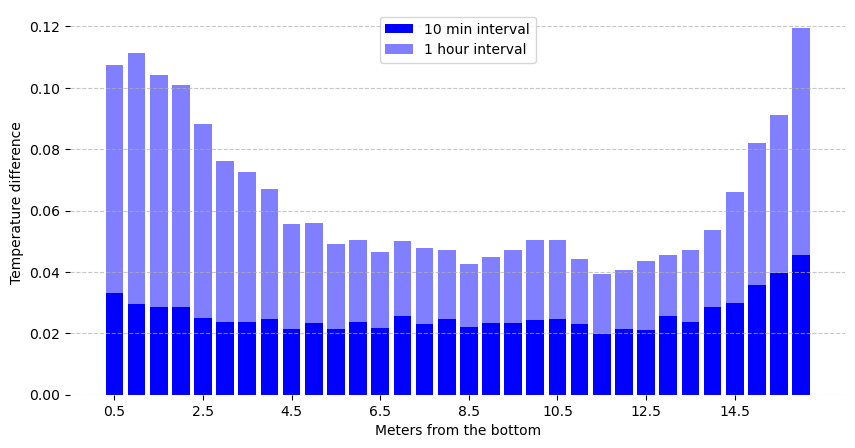

In [8]:
dfw.colums = [f'X{i}' for i in range(32)]


fig, ax = plt.subplots(1,1, figsize=(10,5))
# dfw.diff(axis = 0).abs().mean().plot(ax = ax)
ax.bar(np.arange(0.5, 16.5, 0.5), dfw.diff(axis = 0).abs().mean(), color='blue', alpha=1, width=0.4, label='10 min interval')
ax.bar(np.arange(0.5, 16.5, 0.5), dfw.resample('h').mean().diff(axis = 0).abs().mean(), color='blue', alpha=0.5, width=0.4, label='1 hour interval')


ax.set_xticks(np.arange(0.5, 16.5, 2));
# ax.set_xticklabels([f'{i}' for i in range(32)]);
ax.set_xlabel('Meters from the bottom');
ax.set_ylabel('Temperature difference');
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# remove frame
for spine in ax.spines.values():
    spine.set_visible(False)

ax.legend()


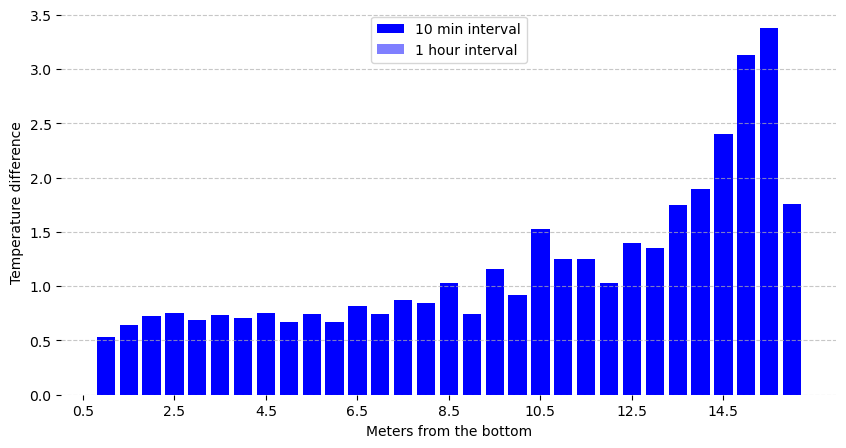

In [9]:
dfw.colums = [f'X{i}' for i in range(32)]


fig, ax = plt.subplots(1,1, figsize=(10,5))
# dfw.diff(axis = 0).abs().mean().plot(ax = ax)
ax.bar(np.arange(0.5, 16.5, 0.5), dfw.diff(axis = 1).abs().mean(), color='blue', alpha=1, width=0.4, label='10 min interval')
ax.bar(np.arange(0.5, 16.5, 0.5), dfw.resample('h').mean().diff(axis = 1).abs().mean(), color='blue', alpha=0.5, width=0.4, label='1 hour interval')


ax.set_xticks(np.arange(0.5, 16.5, 2));
# ax.set_xticklabels([f'{i}' for i in range(32)]);
ax.set_xlabel('Meters from the bottom');
ax.set_ylabel('Temperature difference');
ax.grid(True, axis='y', linestyle='--', alpha=0.7)

# remove frame
for spine in ax.spines.values():
    spine.set_visible(False)

ax.legend()


In [10]:
(df_water_sensors.isna().any(axis = 1)*1).plot()

<Axes: >

Error in callback <function _draw_all_if_interactive at 0x11b50d9e0> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [ ]:
df = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)



2014-01-01 01:00:00+01:00   NaN
2014-01-01 01:10:00+01:00   NaN
2014-01-01 01:20:00+01:00   NaN
2014-01-01 01:30:00+01:00   NaN
2014-01-01 01:40:00+01:00   NaN
                             ..
2021-01-01 00:20:00+01:00   NaN
2021-01-01 00:30:00+01:00   NaN
2021-01-01 00:40:00+01:00   NaN
2021-01-01 00:50:00+01:00   NaN
2021-01-01 01:00:00+01:00   NaN
Name: F_top, Length: 368209, dtype: float64

<Axes: >

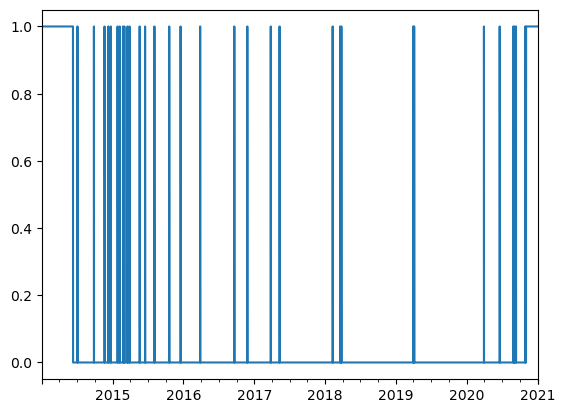

In [ ]:
(df.F_topq.isna()*1).plot()

Text(0.5, 1.0, 'Number of NaNs in flow rates')

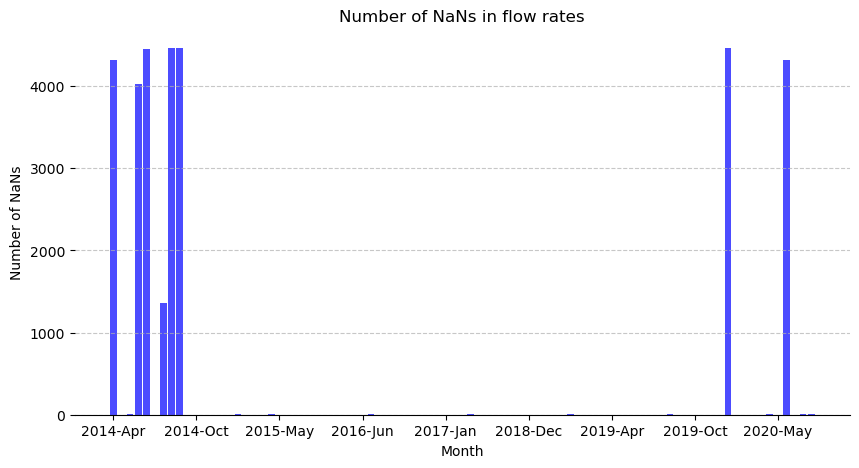

In [ ]:
nans = df[['F_topq','F_botq','F_midq']].isna().any(axis = 1).groupby(df.index.strftime('%Y-%b')).sum()

fig, ax = plt.subplots(1,1, figsize=(10,5))
ax.bar(nans.index, nans.values, color='blue', alpha=0.7)
ax.set_ylabel('Number of NaNs')
ax.set_xlabel('Month')

ax.grid(True, axis='y', linestyle='--', alpha=0.7)
ax.set_xticks(nans.index[::10]);

# remove frame except bottom
for spine in ax.spines.values():
    spine.set_visible(False)
ax.spines['bottom'].set_visible(True)

ax.set_title('Number of NaNs in flow rates')

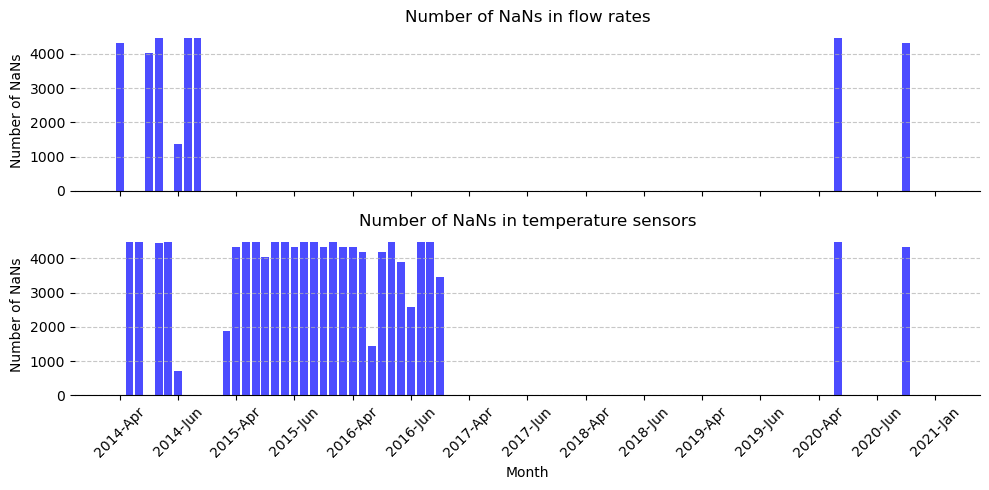

In [ ]:
water_sensors = ['T_{:04.1f}'.format(height) for height in np.linspace(16, 0.5, 32)]


nans = df[['F_topq','F_botq','F_midq']].isna().any(axis = 1).groupby(df.index.strftime('%Y-%b')).sum()

fig, ax = plt.subplots(2,1, figsize=(10,5), sharex=True)
ax[0].bar(nans.index, nans.values, color='blue', alpha=0.7)
ax[0].set_ylabel('Number of NaNs')
# ax[0].set_xlabel('Month')

ax[0].grid(True, axis='y', linestyle='--', alpha=0.7)
ax[0].set_xticks(nans.index[::10]);

# remove frame except bottom
for spine in ax[0].spines.values():
    spine.set_visible(False)
ax[0].spines['bottom'].set_visible(True)

ax[0].set_title('Number of NaNs in flow rates')


nans = df[water_sensors].isna().any(axis = 1).groupby(df.index.strftime('%Y-%b')).sum()

ax[1].bar(nans.index, nans.values, color='blue', alpha=0.7)
ax[1].set_ylabel('Number of NaNs')
ax[1].set_xlabel('Month')

ax[1].grid(True, axis='y', linestyle='--', alpha=0.7)
ax[1].set_xticks(nans.index[::6]);
ax[1].set_xticklabels(nans.index[::6], rotation=45);

# remove frame except bottom
for spine in ax[1].spines.values():
    spine.set_visible(False)
ax[1].spines['bottom'].set_visible(True)

ax[1].set_title('Number of NaNs in temperature sensors')

fig.tight_layout()

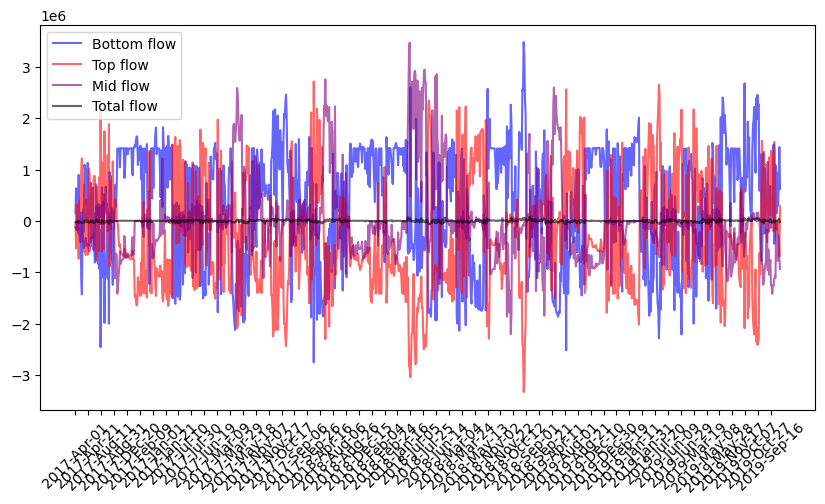

In [ ]:
df2 = df['2017':'2019'].resample('1h').mean()
flows = df2[['F_topq','F_botq','F_midq']].groupby(df2.index.strftime('%Y-%b-%d')).sum()


fig, ax = plt.subplots(1,1, figsize=(10,5))
# ax.bar(np.arange(len(flows)), flows.F_botq, color='red', alpha=0.6, label='Bottom flow')
# ax.bar(np.arange(len(flows)), flows.F_topq, color='blue', alpha=0.6, label='Top flow')
# ax.bar(np.arange(len(flows)), flows.F_midq, color='green', alpha=0.6, label='Mid flow')

ax.plot(np.arange(len(flows)), flows.F_botq, color='blue', alpha=0.6, label='Bottom flow')
ax.plot(np.arange(len(flows)), flows.F_topq, color='red', alpha=0.6, label='Top flow')
ax.plot(np.arange(len(flows)), flows.F_midq, color='purple', alpha=0.6, label='Mid flow')

ax.plot(np.arange(len(flows)), flows.F_botq + flows.F_topq + flows.F_midq, color='black', alpha=0.6, label='Total flow')

ax.set_xticks(np.arange(len(flows))[::20]);
ax.set_xticklabels(flows.index[::20], rotation=45);

ax.legend()


In [ ]:
df


,SO.DA.ET.422.5,SO.DA.HT.422.1.F,SO.DA.HT.422.1.T,SO.DA.HT.422.2.F,SO.DA.HT.422.2.T,SO.DA.LT.421,T_00.5,T_01.5,T_02.5,T_03.5,...,Q_ch_bot_calc,Q_dis_bot_calc,FR_top_c,FR_mid_c,FR_bot_c,Q_top,Q_mid,Q_bot,Q_ch_dir,Q_dis_dir
2014-01-01 01:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2014-01-01 01:10:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2014-01-01 01:20:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2014-01-01 01:30:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2014-01-01 01:40:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-01-01 00:20:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2021-01-01 00:30:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2021-01-01 00:40:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0
2021-01-01 00:50:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,-0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,-0.0


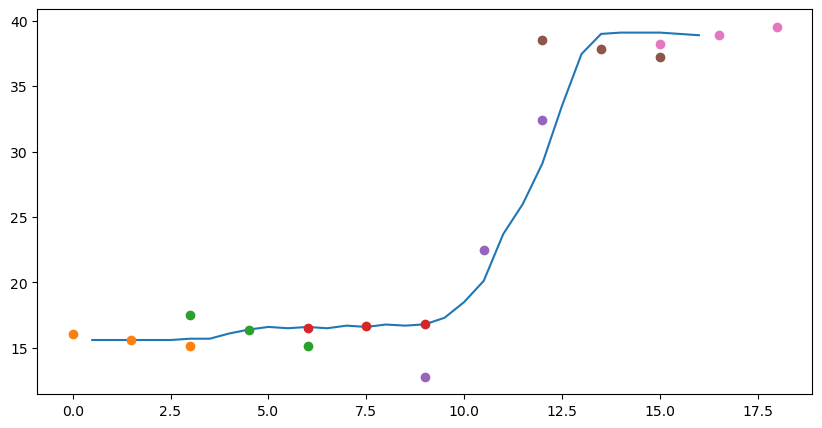

In [ ]:
d.iloc[100]

fig, ax = plt.subplots(1,1,figsize=(10,5))
ax.plot(df.iloc[100])

ax.plot([0,1.5,3], [15.628+0.30*1.5, 15.628, 15.628-0.30*1.5], 'o')

ax.plot([3,4.5,6], [16.33089+0.79*1.5, 16.33089, 16.33089-0.79*1.5], 'o')

ax.plot([6,7.5,9], [16.665-0.11*1.5, 16.665, 16.665+0.1*1.5], 'o')

ax.plot([9,10.5,12], [22.48-6.46*1.5, 22.48, 22.48+6.64*1.5], 'o')

ax.plot([12,13.5,15], [37.86+0.43*1.5, 37.86, 37.86-0.43*1.5], 'o')

ax.plot([15,16.5,18], [38.9-0.43*1.5, 38.9, 38.9+0.43*1.5], 'o')



,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0
2017-01-01 00:00:00+01:00,16.4,16.300000,16.300000,16.3,16.35,16.4,16.300000,16.3,16.400000,16.500000,...,29.100000,34.400000,37.70,39.250000,39.5,39.5,39.4,39.5,39.5,39.300000
2017-01-01 01:00:00+01:00,16.4,16.300000,16.316667,16.3,16.40,16.4,16.300000,16.3,16.400000,16.416667,...,29.100000,34.333333,37.70,39.216667,39.5,39.5,39.4,39.5,39.5,39.283333
2017-01-01 02:00:00+01:00,16.4,16.300000,16.300000,16.3,16.40,16.4,16.300000,16.3,16.400000,16.450000,...,29.016667,34.300000,37.70,39.233333,39.5,39.5,39.4,39.5,39.5,39.283333
2017-01-01 03:00:00+01:00,16.3,16.283333,16.300000,16.3,16.40,16.4,16.300000,16.3,16.400000,16.500000,...,29.000000,34.216667,37.65,39.233333,39.5,39.5,39.4,39.5,39.5,39.300000
2017-01-01 04:00:00+01:00,16.3,16.200000,16.300000,16.3,16.40,16.4,16.316667,16.3,16.483333,16.500000,...,28.966667,34.200000,37.60,39.200000,39.5,39.5,39.4,39.5,39.5,39.300000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 22:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data


/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_955/1424220957.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html


(0.0, 1.0)

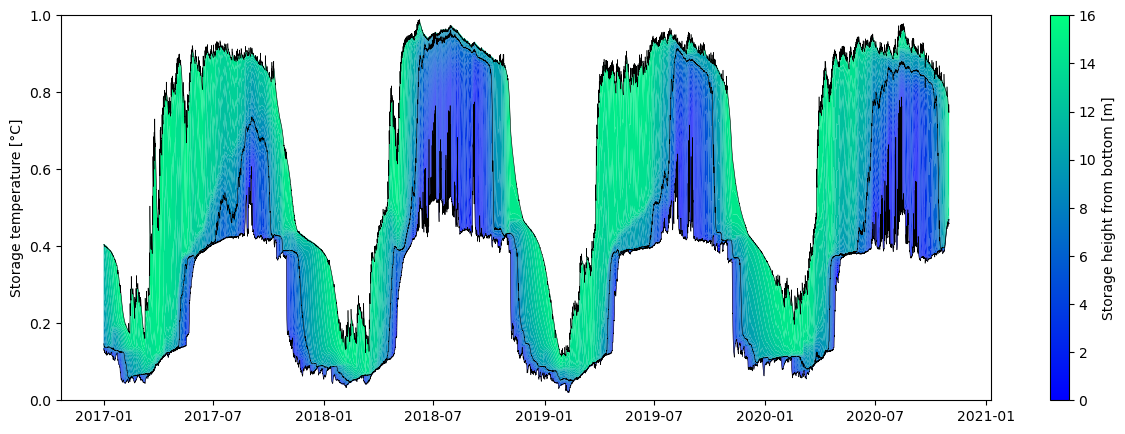

In [ ]:
import matplotlib
cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html

df1 = df.copy() # make a copy of the dataframe to use it for the plot

fig, ax = plt.subplots(figsize=(15,5))

# Plot color between two temperature sensors
for i in range(df1.shape[1]-1):
    c1 = df1.columns[i]
    c2 = df1.columns[i+1]
    ax.fill_between(df1.index, df1[c2], df1[c1],
                where=df1[c2] >= df1[c1],
                facecolor=cmap(i/len(df1.columns))
                   )
                
cax, _ = matplotlib.colorbar.make_axes(ax) 
cb2 = matplotlib.colorbar.ColorbarBase(
    cax, cmap=cmap, norm=plt.Normalize(0,16),
    label='Storage height from bottom [m]')

ax.plot(df1[df1.columns[0]], c='k', lw=0.4)
ax.plot(df1[df1.columns[int(df1.shape[1]/2)]], c='k', lw=0.4)
ax.plot(df1[df1.columns[-1]], c='k', lw=0.4)

# Format y-label and set y-limit
ax.set_ylabel('Storage temperature [°C]')
ax.set_ylim(0, 1)



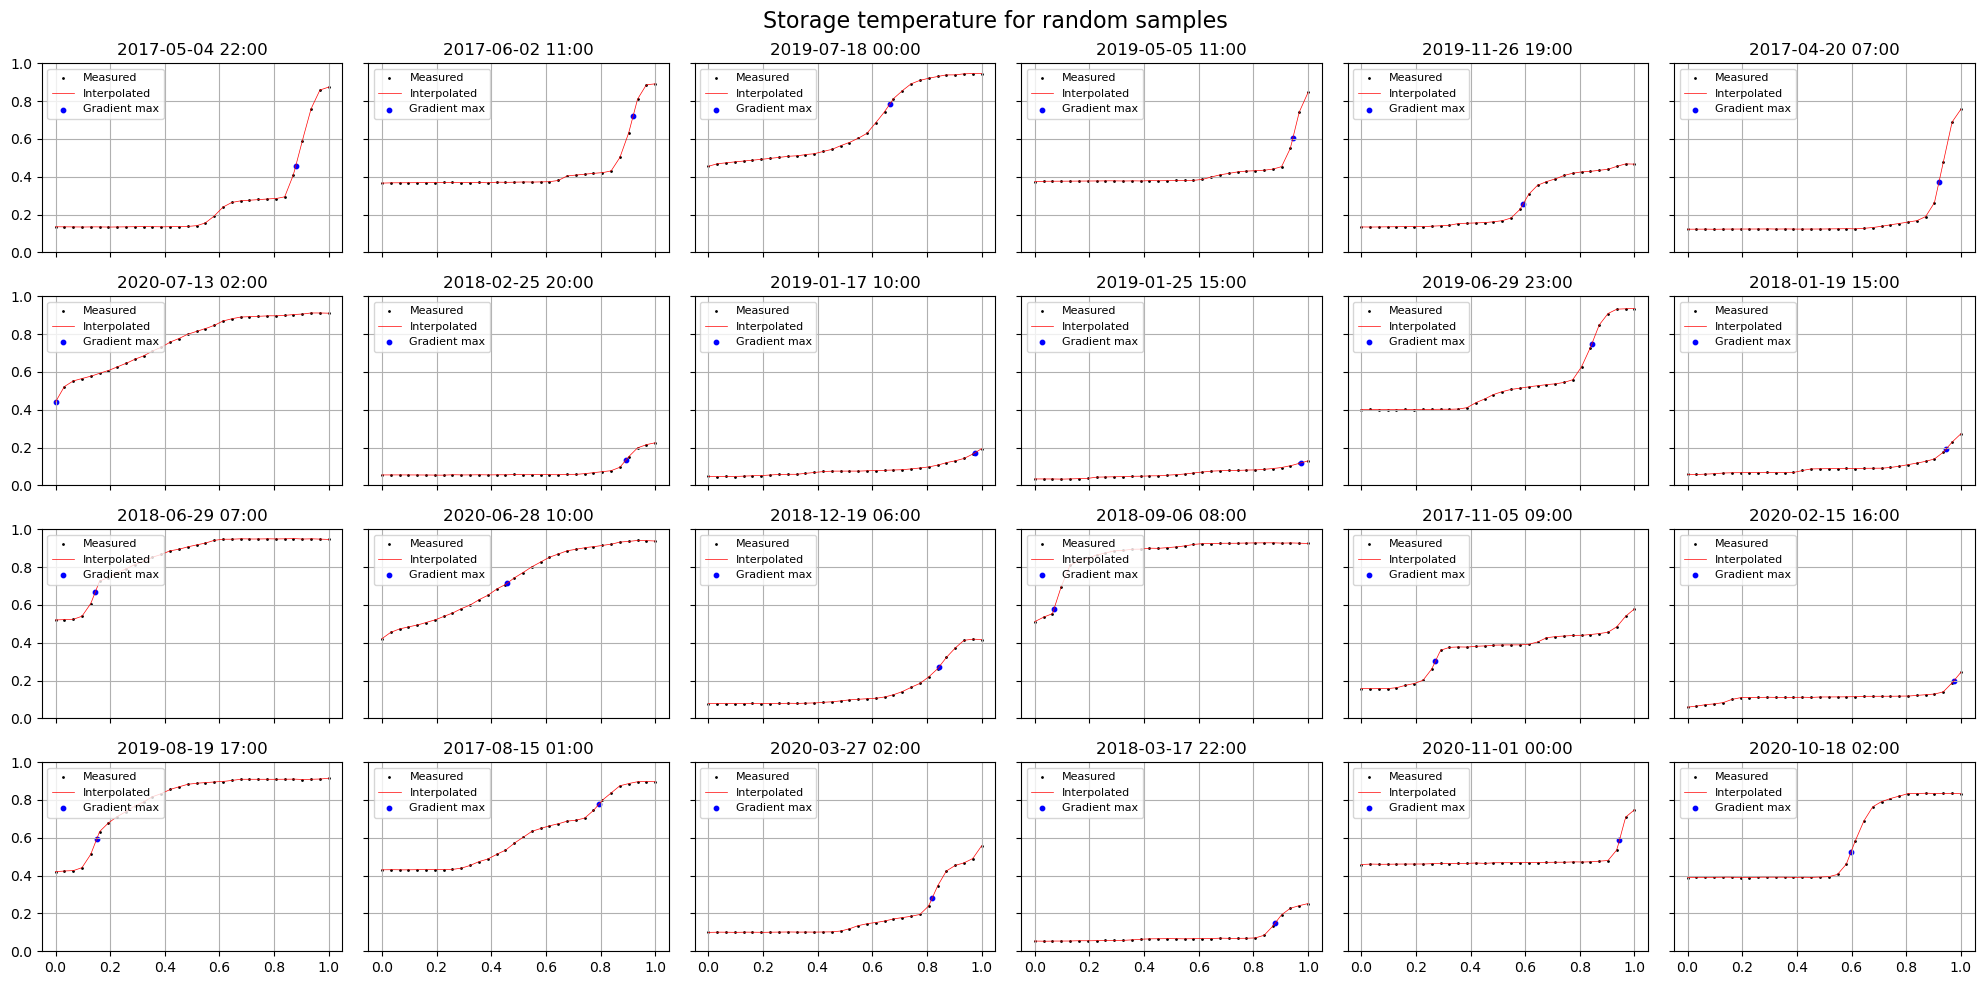

In [ ]:
from scipy.interpolate import interp1d

fig, ax = plt.subplots(4,6, figsize=(20,10), sharex=True, sharey=True)

for i in range(4*6):
    idx = np.random.randint(0, len(df))
    time = df.index[idx].strftime('%Y-%m-%d %H:%M')
    y = df.iloc[idx].values
    x = np.linspace(0,1,32)
    f = interp1d(x, y, kind='linear')
    xp = np.linspace(0,1,200)
    yp = f(xp)
    gradient = np.gradient(yp)
    z = np.argmax(gradient)
    ax[i//6, i%6].scatter(x,y, c='k', s = 1, label='Measured')
    ax[i//6, i%6].plot(xp, yp, c='r', lw=0.5, label='Interpolated')
    ax[i//6, i%6].scatter(xp[z], yp[z], c='b', s = 10, label='Gradient max')
    ax[i//6, i%6].set_title(time)
    ax[i//6, i%6].set_ylim(0, 1)
    ax[i//6, i%6].grid()

    ax[i//6,i%6].legend(loc = 'upper left', fontsize = 8)
fig.suptitle('Storage temperature for random samples', fontsize=16)
plt.tight_layout()

/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_955/3641458901.py:17: RuntimeWarning: Mean of empty slice.
  df_grad.iloc[i] = [z/200, grad[z], y.max(), y.min(), grad[grad > 0].mean()]
/opt/miniconda3/envs/DTU/lib/python3.12/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


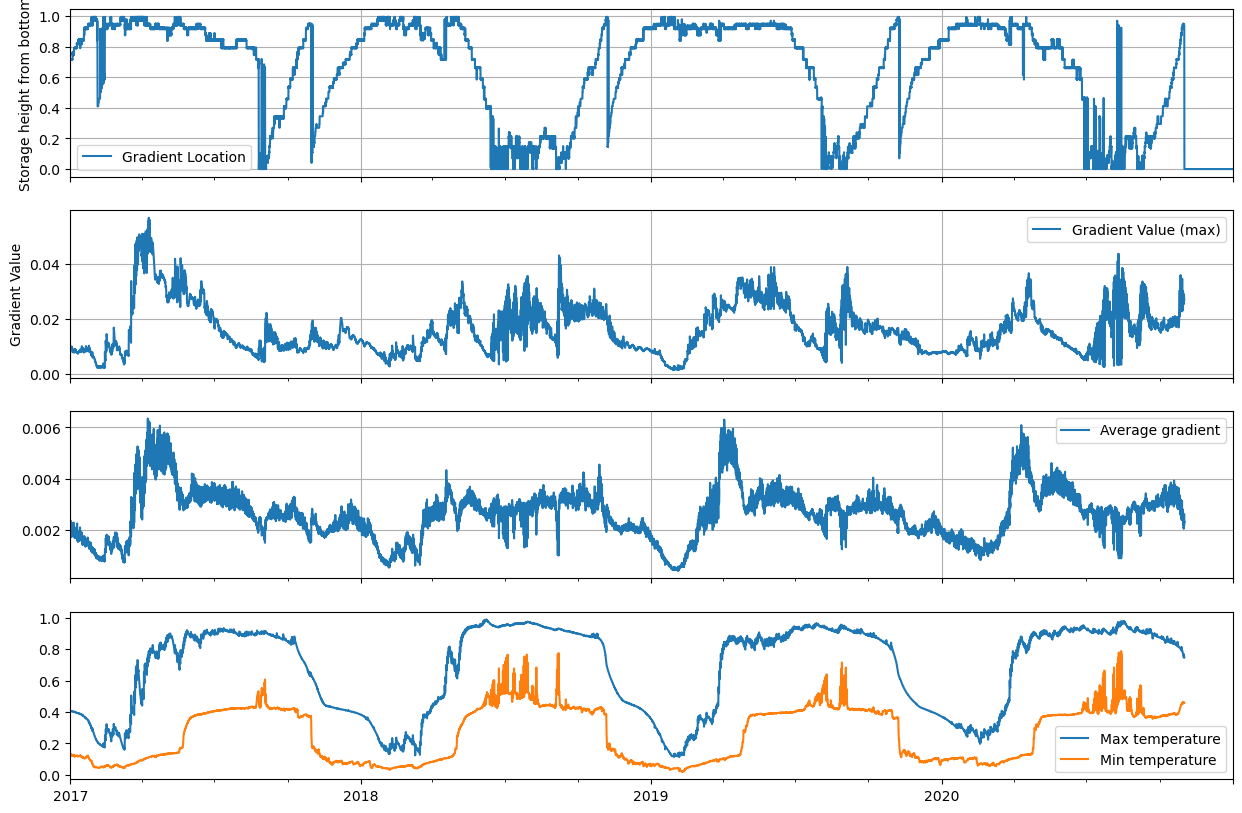

In [ ]:
from scipy.interpolate import interp1d

def get_grad(y):
    x = np.linspace(0,1,32)
    f = interp1d(x, y, kind='linear')
    xp = np.linspace(0,1,200)
    yp = f(xp)
    gradient = np.gradient(yp)
    z = np.argmax(gradient)
    return z, gradient

df_grad = pd.DataFrame(index=df.index, columns=['z', 'grad', 'max_temp', 'min_temp', 'avg_grad'])
for i in range(len(df)):
    y = df.iloc[i].values
    z, grad = get_grad(y)
    
    df_grad.iloc[i] = [z/200, grad[z], y.max(), y.min(), grad[grad > 0].mean()]

fig, ax = plt.subplots(4,1, figsize=(15,10), sharex=True)
df_grad['z'].plot(ax=ax[0], label='Gradient Location')
df_grad['grad'].plot(ax=ax[1], label='Gradient Value (max)')
ax[0].set_ylabel('Storage height from bottom')
ax[1].set_ylabel('Gradient Value')

df_grad['avg_grad'].plot(ax=ax[2], label='Average gradient')
df_grad['max_temp'].plot(ax=ax[3], label='Max temperature')
df_grad['min_temp'].plot(ax=ax[3], label='Min temperature')
ax[0].grid()
ax[0].legend()
ax[1].grid()
ax[1].legend()
ax[2].grid()
ax[2].legend()
ax[3].legend()


/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_955/4195966879.py:27: RuntimeWarning: overflow encountered in exp
  log1 = lambda x, b, mu, k : b/(1+exp(-(x-mu)/k))


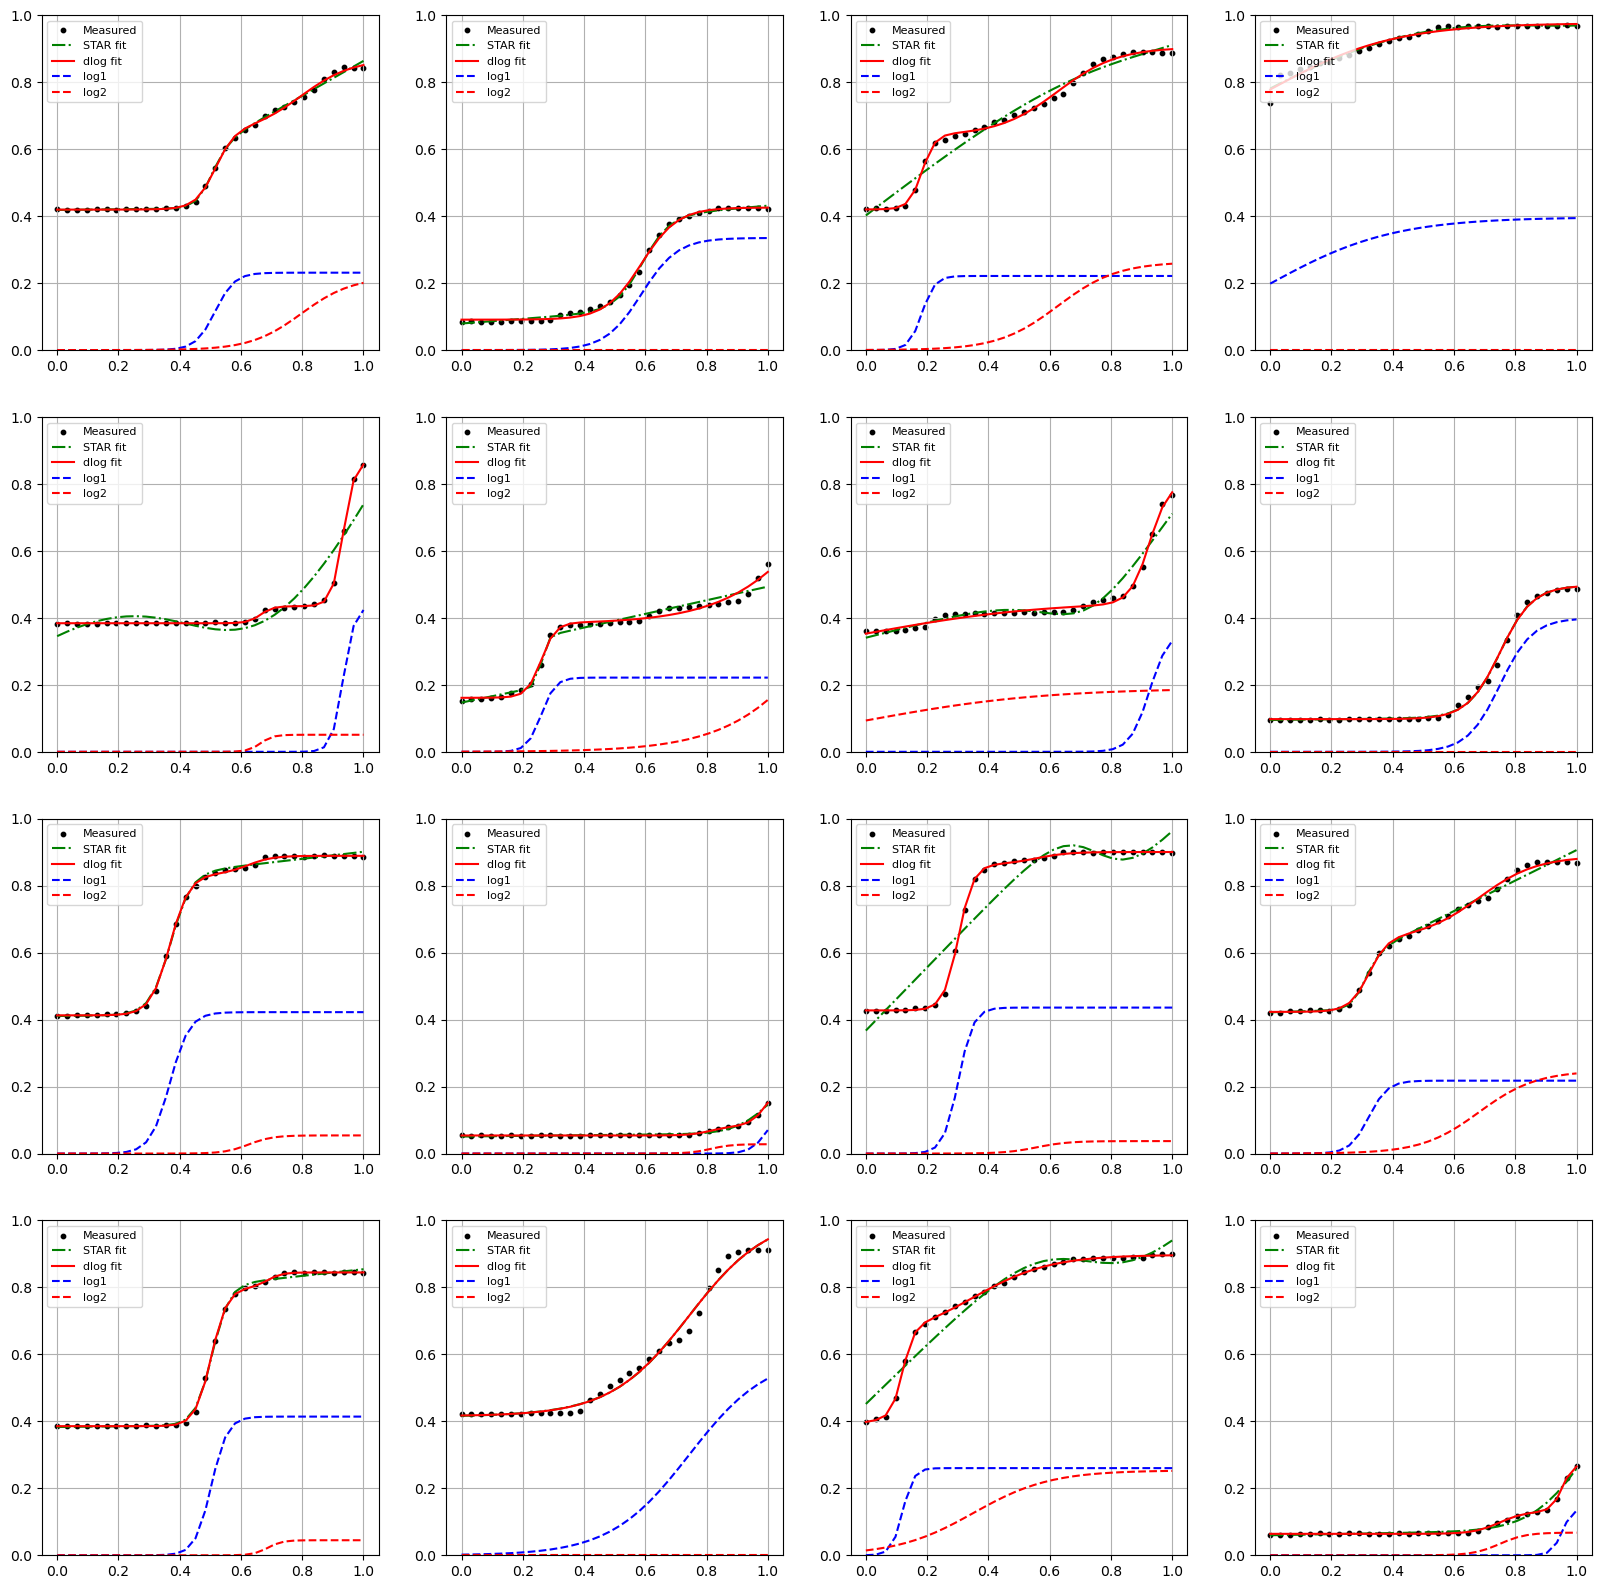

In [ ]:
from scipy.optimize import curve_fit
from numpy import exp, log
temp = df.dropna()
bounds = np.array([[y.min()-1e-3, y.min()+1e-3],
                    [0, 1],
                    [y.min(), y.max()],
                    [0, 1],
                    [y.max()-1e3,y.max()+1e-3],
                    [0, 1],
                    [0, 1],
                    [1e-2, 2],
                    [1e-2, 2]]).T

bounds = np.array([[0, 1],
                    [0, 1],
                    [0, 1],
                    [0, 1],
                    [0, 1],
                    [1e-2, 2],
                    [1e-2, 2]]).T

flinear = lambda x, b0, a0: b0 + a0*x
fSTAR = lambda x, b0, a0, b1, a1, mu, k : (b0+a0*x)+(1/(1+exp(-(x-mu)/k)))*(b1-b0+a1*(x-1))
# fdlog = lambda x, b0, b1, b2, mu1, mu2, k1, k2 : (b0)+(1/(1+exp(-(x-(mu1))/k1)))*(b1)+(1/(1+exp(-(x-(mu2+mu1))/k2)))*(b2)


log1 = lambda x, b, mu, k : b/(1+exp(-(x-mu)/k))
log2 = lambda x, b, mu, k : b/(1+exp(-(x-mu)/k))
fdlog = lambda x, b0, b1, mu1, k1, b2, mu2, k2 : b0+log1(x, b1, mu1, k1)+log2(x, b2, mu2, k2)


fig, ax = plt.subplots(4,4, figsize=(20,20))

for i in range(4*4):
    idx = np.random.randint(0, len(temp))
    y = temp.iloc[idx].values
    x = np.linspace(0,1,32)
    ax[i//4, i%4].scatter(x,y, c='k', s = 10, label='Measured')
    popt, pcov = curve_fit(fSTAR, x, y, maxfev=10000, bounds=(1e-2,1), loss = 'soft_l1', method='trf')
    ax[i//4, i%4].plot(x, fSTAR(x, *popt), c='green', lw=1.5, label='STAR fit', linestyle='-.')


    popt, pcov = curve_fit(fdlog, x, y, maxfev=1e6, bounds=bounds, loss = 'linear', method='trf', xtol=1e-12, ftol=1e-12)
    # params = {'b0': popt[0], 'b1': popt[1], 'b2': popt[2], 'mu1': popt[3], 'mu2': popt[4], 'k1': popt[5], 'k2': popt[6]}
    # ax[i//4, i%4].text(0.01, 0.1, '\n'.join([f'{k} = {v:.2f}' for k,v in params.items()]), fontsize=8, transform=ax[i//6, i%6].transAxes)

    ax[i//4, i%4].plot(x, fdlog(x, *popt), c='r', lw=1.5, label='dlog fit')
    ax[i//4, i%4].plot(x, log1(x, *popt[1:4]),lw=1.5, linestyle='--', c = 'blue', label = 'log1')
    ax[i//4, i%4].plot(x,  log2(x, *popt[4:7]),lw=1.5, linestyle='--', c='red', label = 'log2')

    # ax[i//6, i%6].plot(x, fdlog(x, params['b0'], 0, 0, *popt[-6:]), c='k', lw=0.5, linestyle='-.')


    ax[i//4, i%4].set_ylim(0, 1)
    ax[i//4, i%4].grid()
    ax[i//4, i%4].legend(loc = 'upper left', fontsize = 8)



In [ ]:
from tqdm import tqdm
N = 1000
pars = np.random.rand(N, 7)

log1 = lambda x, b, mu, k : b/(1+exp(-(x-mu)/k))
log2 = lambda x, b, mu, k : b/(1+exp(-(x-mu)/k))
fdlog = lambda x, b0, b1, mu1, k1, b2, mu2, k2 : b0+log1(x, b1, mu1, k1)+log2(x, b2, mu2, k2)



bounds = np.array([[0,1],
                    [0,1],
                    [-0.5,1.5],
                    [1e-2,1],
                    [0,1],
                    [-.5,1.5],
                    [1e-2, 1]]).T

p = np.ones(7)*0.5
p[-2:] = 1
for i in tqdm(range(N)):
    y = df.iloc[i].values
    popt, pcov = curve_fit(fdlog, x, y, p0 = p, max_nfev=1e6, bounds=bounds, loss = 'soft_l1', method='trf')
    pars[i] = popt

    p = popt 

    bounds = np.array([[max(popt[0]-1e-2, 0), min(popt[0]+1e-2,1)],
                        [max(popt[1]-1e-2, 0), min(popt[1]+1e-2,1)],
                        [max(popt[2]-1e-2,-1), min(popt[2]+1e-2,2)],
                        [max(popt[3]-1e-2, 1e-2), min(popt[3]+1e2,1)],
                        [max(popt[4]-1e-2, 0), min(popt[4]+1e-2,1)],
                        [max(popt[5]-1e-2, -1), min(popt[5]+1e-2,2)],
                        
                        [max(popt[6]-1e-2,1e-2), min(popt[6]+1e-2,1)]]).T

100%|██████████| 1000/1000 [00:24<00:00, 41.23it/s]


IndexError: index 4000 is out of bounds for axis 0 with size 1000

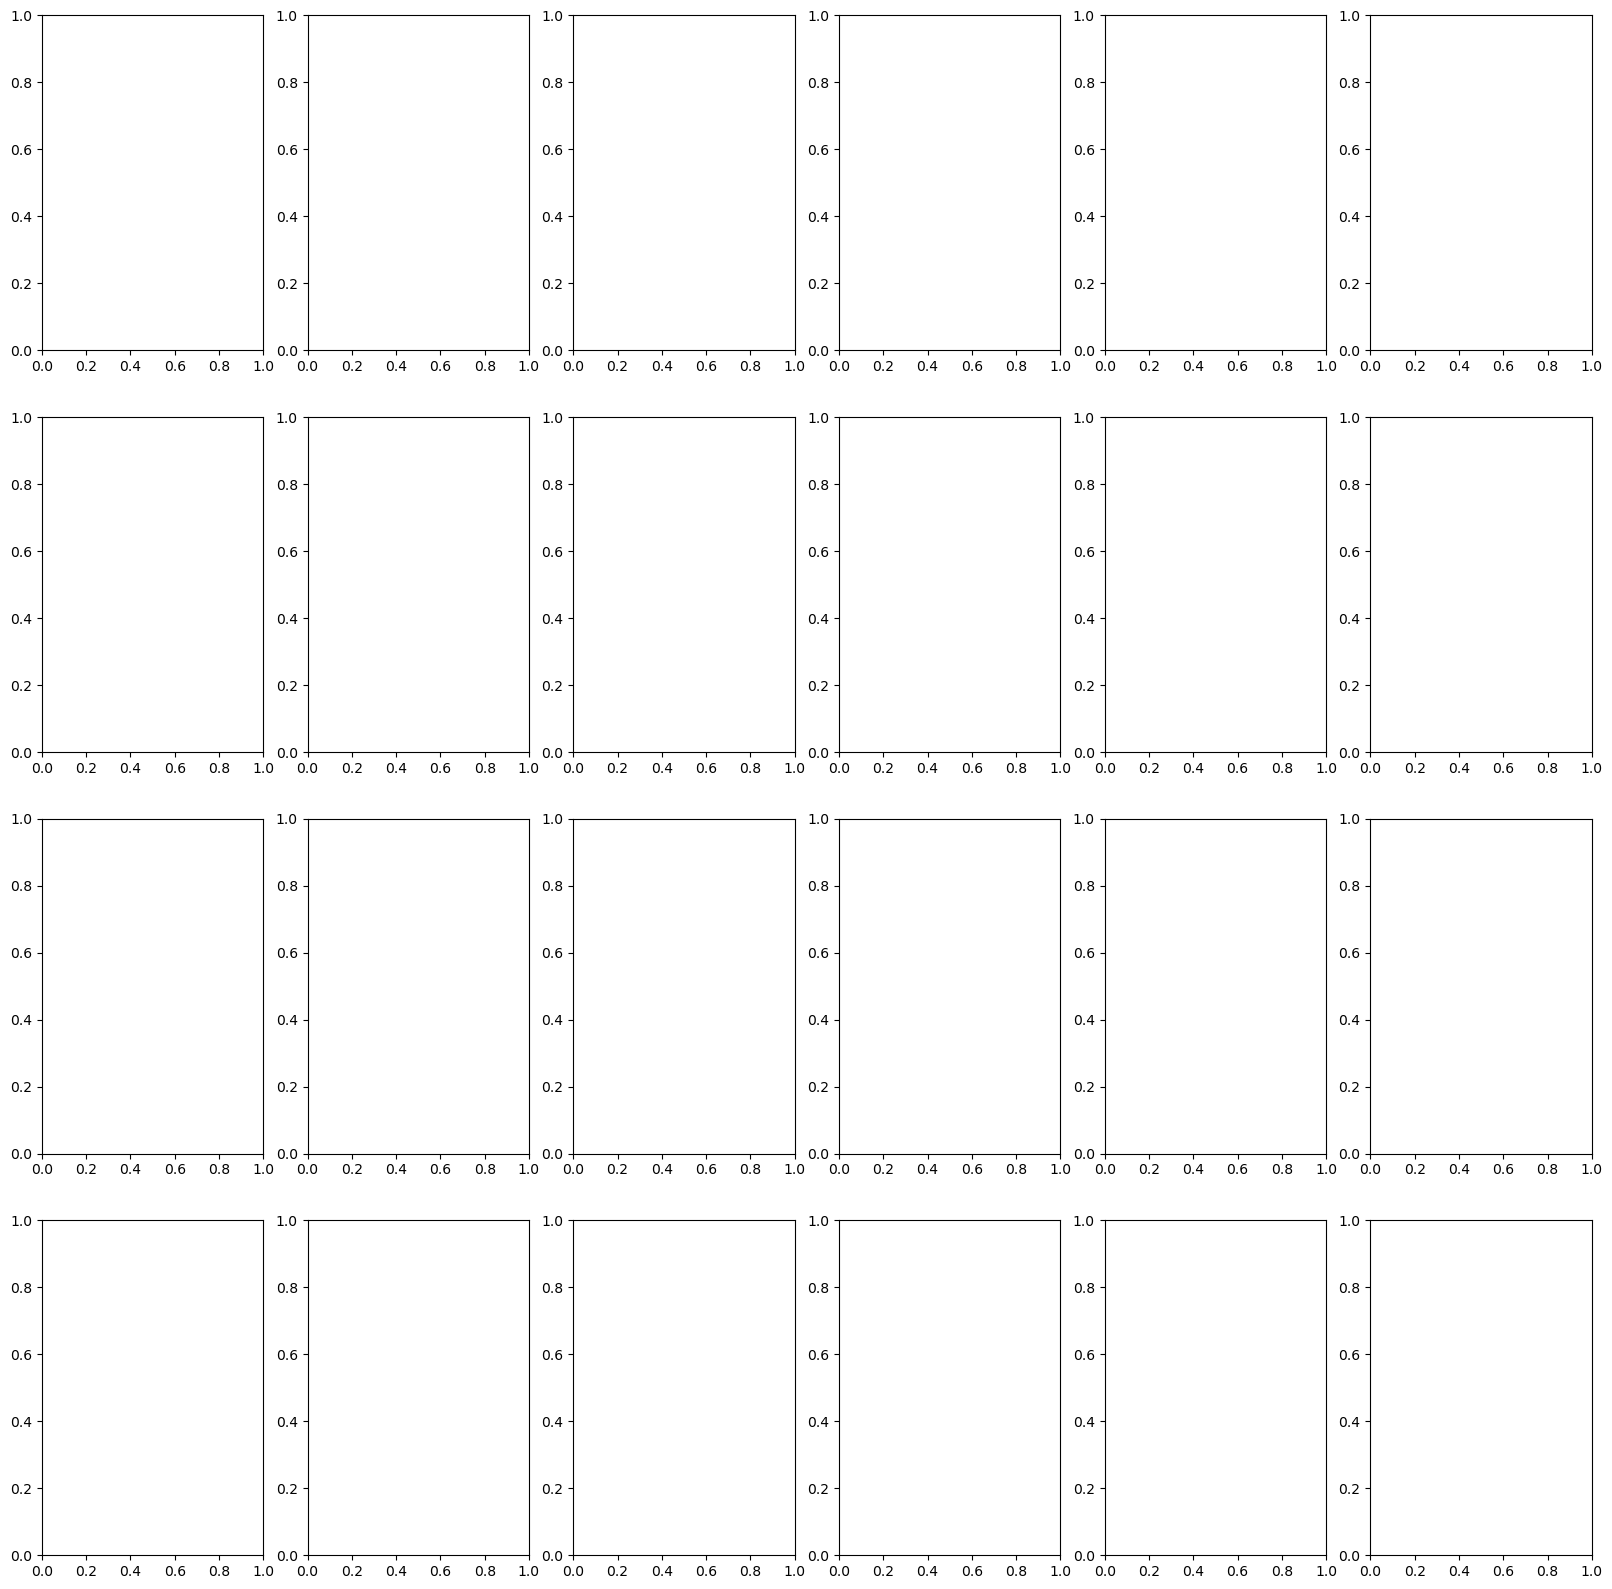

In [ ]:
fig, ax = plt.subplots(4,6, figsize=(20,20))

start = 4000



step = 48
for i in range(4*6):
    idx = start + i*step
    y = df.iloc[idx].values
    time = df.index[idx].strftime('%Y-%m-%d %H:%M')
    x = np.linspace(0,1,32)
    p = pars[idx]

    ax[i//6, i%6].scatter(x,y, c='k', s = 10, label='Measured')
    ax[i//6, i%6].plot(x, fdlog(x, *p), c='r', lw=1.5, label='dlog fit')
    ax[i//6, i%6].plot(x, log1(x, *p[1:4]),lw=1.5, linestyle='--', c = 'blue', label = 'Middle log')
    ax[i//6, i%6].plot(x, log2(x, *p[4:7]),lw=1.5, linestyle='--', c='red', label = 'Top log')
    ax[i//6, i%6].set_ylim(0, 1)
    ax[i//6, i%6].grid()
    ax[i//6, i%6].set_title(time)
    ax[i//6, i%6].legend(loc = 'upper left', fontsize = 8)

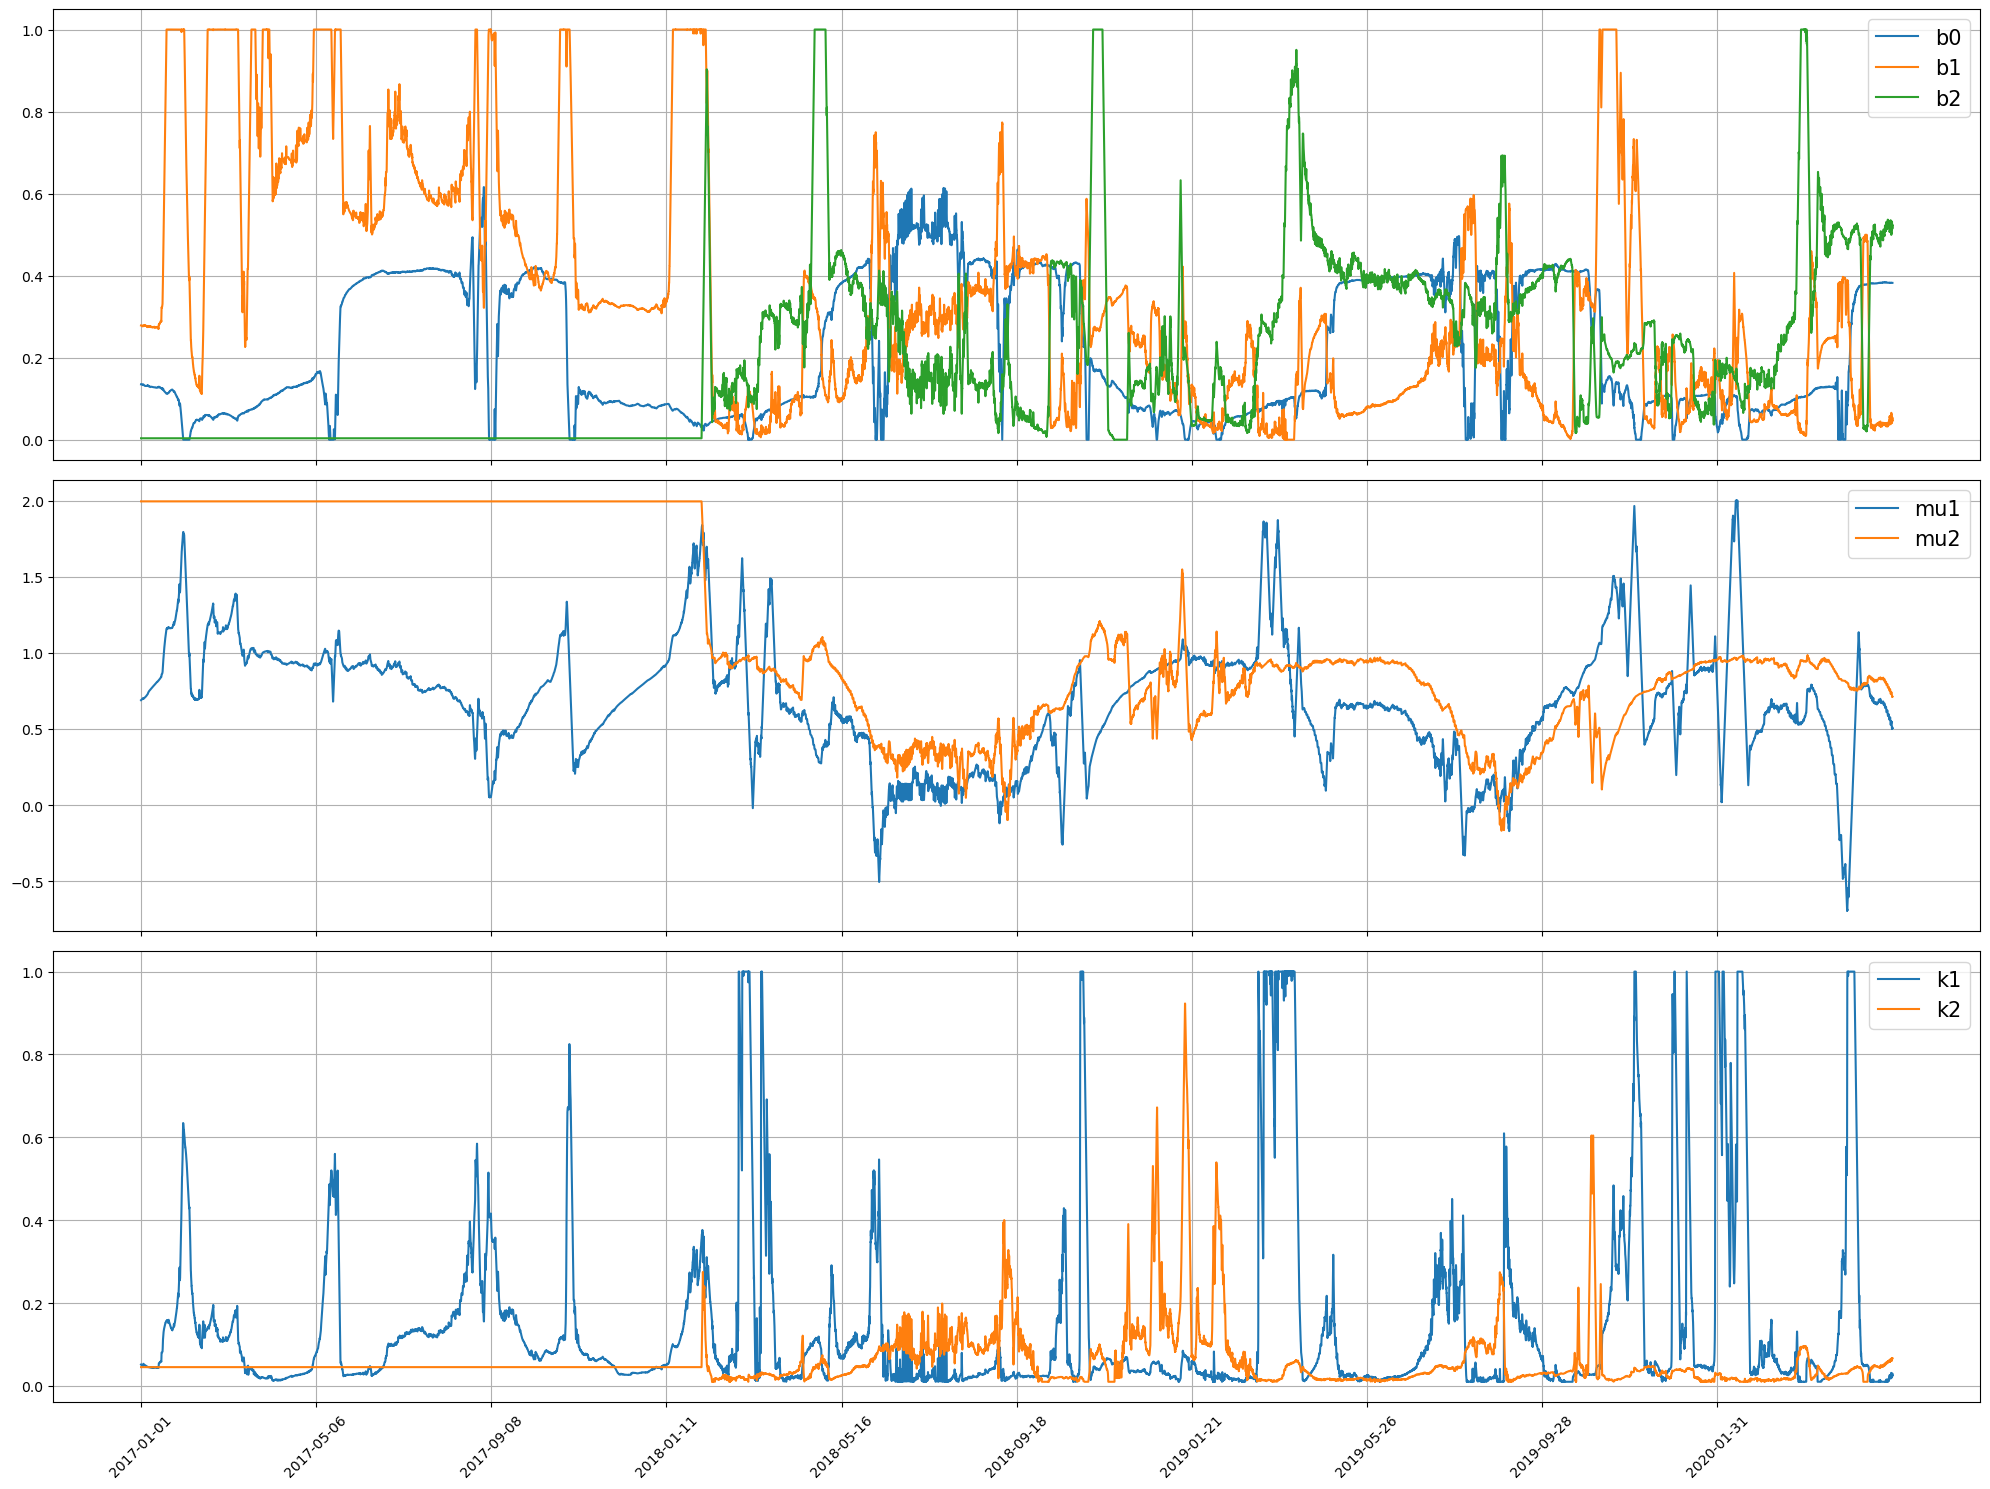

In [ ]:
fig, ax = plt.subplots(3,1, figsize=(20,15), sharex=True)
params = ['b0', 'b1', 'b2', 'mu1', 'mu2', 'k1', 'k2'] 

ax[0].plot(pars[:,0], label = 'b0')
ax[0].plot(pars[:,1], label = 'b1')
ax[0].plot(pars[:,4], label = 'b2')

# ax[0].plot(df[:N].min(axis=1).values, label = 'Min temperature', linestyle='--', c='k', lw=0.5)
# ax[0].plot(df[:N].max(axis=1).values, label = 'Max temperature', linestyle='--', c='k', lw=0.5)

ax[0].legend(fontsize=15)
ax[0].grid()

ax[1].plot(pars[:,2], label = 'mu1')
ax[1].plot(pars[:,5], label = 'mu2')

ax[1].legend(fontsize=15)
ax[1].grid()


ax[2].plot(pars[:,3], label = 'k1')
ax[2].plot(pars[:,6], label = 'k2')
ax[2].legend(fontsize=15)
ax[2].grid()

ax[2].set_xticks(range(0, N, N//10))
ax[2].set_xticklabels([df.index[i].strftime('%Y-%m-%d') for i in range(0, N, N//10)], rotation=45);

fig.tight_layout()

In [ ]:
mu1 = pars[:,3]
mu2


In [ ]:
data = pd.read_csv('../data/processed/Dronninglund_treated_data_and_flow_rates.csv', index_col=0, parse_dates=True)



In [ ]:
f = data.F_top_vol['2017':'2020']
f = f.resample('h').mean()
f = f[:30000].values



array([27.2       , 27.21666667, 28.13333333, ..., 33.45      ,
       30.68333333, 30.21666667])

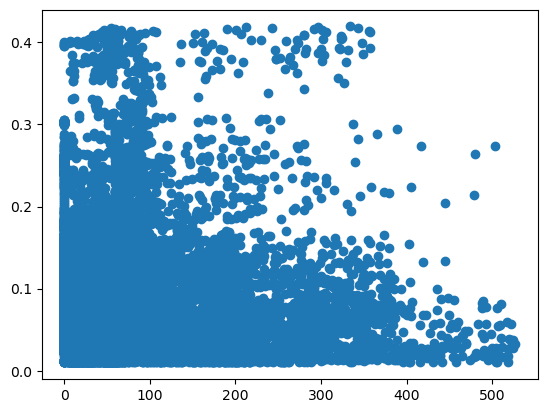

In [ ]:
plt.scatter(f, mu1)

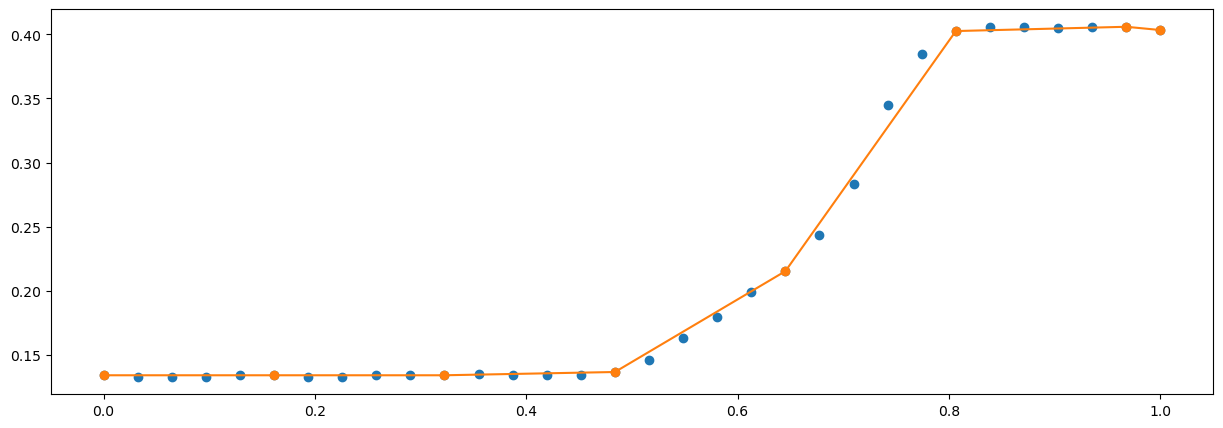

In [ ]:
y = df.iloc[1].values


yp = y[::5]
xp = x[::5]
yp = np.append(yp, y[-1])
xp = np.append(xp, x[-1])
fig, ax = plt.subplots(1,1, figsize=(15,5))
ax.plot(x,y, 'o')
ax.plot(xp,yp, '-o')


In [ ]:
yp

0.5     0.134118
3.0     0.134118
5.5     0.134118
8.0     0.136667
10.5    0.215294
13.0    0.402941
15.5    0.405882
Name: 2017-01-01 00:00:00+01:00, dtype: float64

# Old stuffss


In [ ]:
from sklearn.decomposition import PCA, NMF
pca = PCA(n_components=4)
pca.fit(X)

NameError: name 'X' is not defined

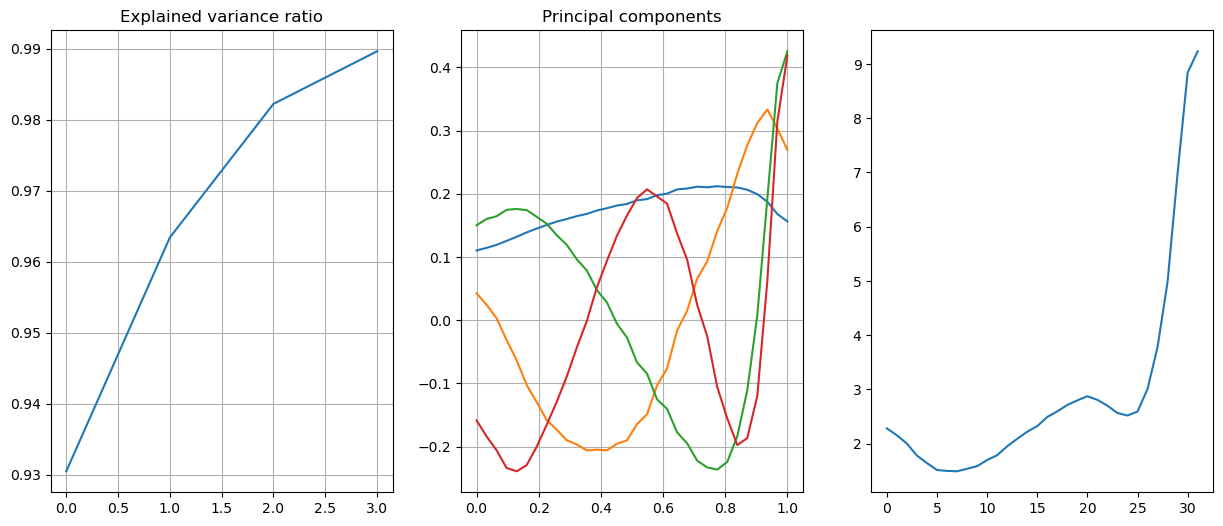

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
x = np.linspace(0,1,32)
ax[0].set_title('Explained variance ratio')
ax[0].plot(np.cumsum(pca.explained_variance_ratio_))
ax[0].grid()

ax[1].plot(x,pca.components_.T);
ax[1].set_title('Principal components')
ax[1].grid()

ax[2].plot((pca.components_.T*np.sqrt(pca.singular_values_)).sum(axis = 1))

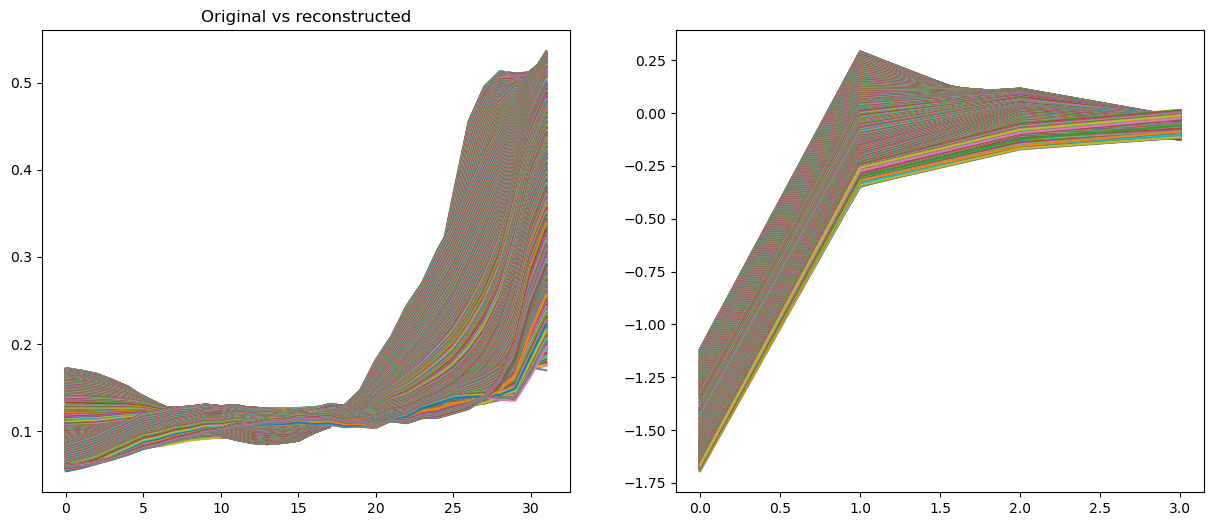

In [ ]:
X_transform = pca.transform(X)
X_reconstructed = pca.inverse_transform(X_transform)

i = 12002
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
ax[0].plot(X[1:1090].T, label='Original')
ax[0].plot(X_reconstructed[1:1090].T, label='Reconstructed')
ax[0].set_title('Original vs reconstructed')
# ax[0].legend()

ax[1].plot(X_transform[1:1090].T);

In [ ]:
nmf = NMF(n_components=5, alpha_W=0.01)
nmf.fit(X)

/opt/miniconda3/envs/DTU/lib/python3.12/site-packages/sklearn/decomposition/_nmf.py:1770: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn(


NMF(alpha_W=0.01, n_components=5)

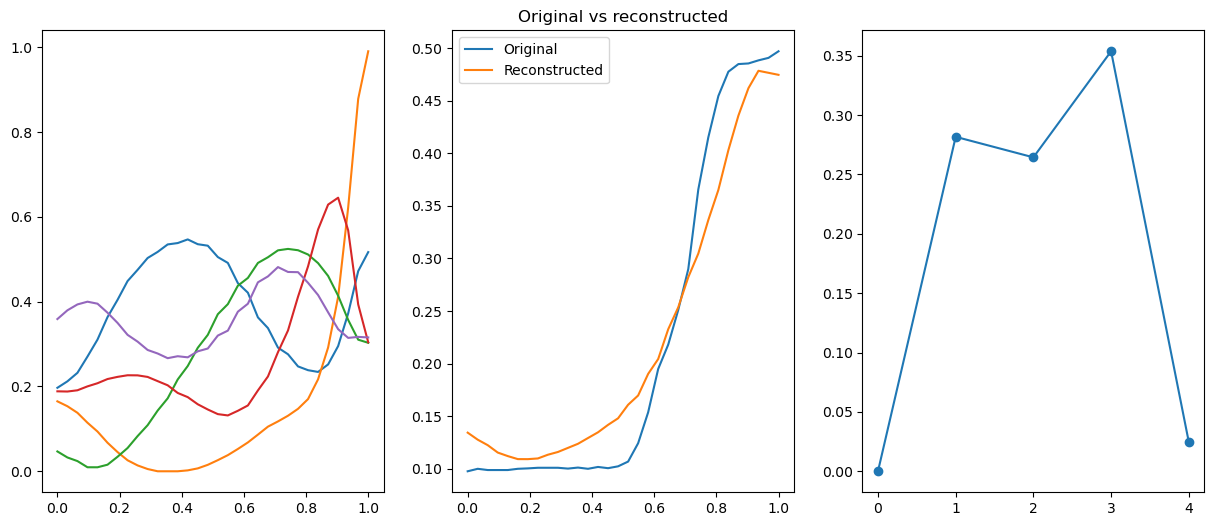

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(15, 6))
x = np.linspace(0,1,32)
ax[0].plot(x,nmf.components_.T);

X_transform = nmf.transform(X)
X_reconstructed = nmf.inverse_transform(X_transform)
i = 20001
ax[1].plot(x,X[i], label='Original')
ax[1].plot(x,X_reconstructed[i], label='Reconstructed')
ax[1].set_title('Original vs reconstructed')
ax[1].legend()
ax[2].plot(X_transform[i], marker = 'o')

# Models


20001 (32,)
[ 0.09656794 -0.02703359  0.17014865  0.170058    0.15369578  0.67741938]


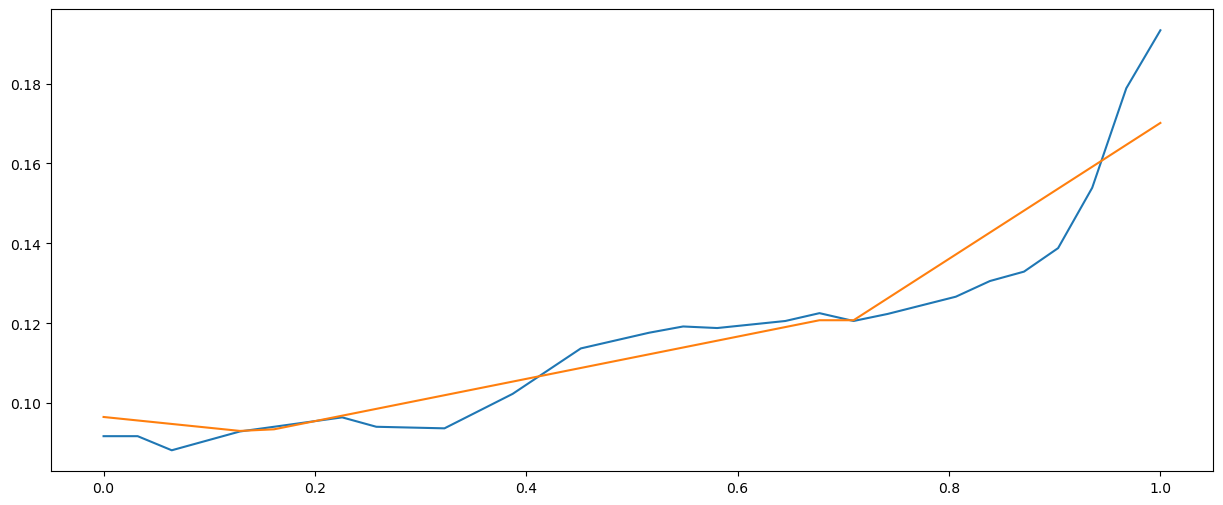

In [ ]:
from scipy.optimize import minimize
def piecewise_linear(b0, x0, b1, x1, r1, r2, x):

    y1 = (b0 + x0 * x)[x <= r1]
    y2 = (b1 + x1 * (x-1))[x >= r2]

    b = y1[-1]
    a = (y2[0] - y1[-1]) / (r2 - r1)
    y3 = (a * (x - r1) + b)[(x > r1) & (x < r2)]
    y = np.concatenate([y1, y3, y2])
    return y


def loss(params, x, y):
    y_hat = piecewise_linear(*params, x)
    return np.sum((y - y_hat)**2)

x = np.linspace(0,1,32)
y = X[1000]
print(i, y.shape)
params = [0, 0.5, 0, 0.5, 0.2, 0.5]

bounds = [(None, None), (None, None), (None, None), (None, None), (0, 1), (0, 1)]
res = minimize(loss, params, args=(x, y), bounds=bounds)

fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(x, y, label='Original')
ax.plot(x, piecewise_linear(*res.x, x), label='Fitted')
print(res.x)

In [ ]:
from scipy.optimize import minimize, curve_fit
from tqdm import tqdm
from numpy import inf
def STAR(x, b0: float, b1: float, a0: float, a1:float, mu:float, k:float):

    I = lambda x: 1/(1+np.exp(-(x-mu)/k))

    return (b0+a0*x)+I(x)*(b1-b0+a1*(x-1))

def STAR2(x, b0: float, b1: float, b2:float, a0: float, a1:float, a2:float, mu1:float, mu2:float, k1:float, k2:float):

    I1 = lambda x: 1/(1+np.exp(-(x-mu1)*k1))
    I2 = lambda x: 1/(1+np.exp(-(x-mu2)*k2))

    return b0+a0*x+I1(x)*(b1+a1*x)+I2(x)*(b2+a2*(x-1))






In [ ]:
from tqdm import tqdm
N = len(X)
x = np.linspace(0,1,32)
pars = np.zeros((N, 6))
p1 = [1,1,1,1,1,1]
pmin,pmax = 1e-2, 1
a = 0.05
bounds = np.array([(pmin,pmax)]*6).T
bounds.shape
for i in tqdm(range(N)):
    y = X[i]
    popt,pcov = curve_fit(STAR, x, y, p0 = p1, bounds=bounds, loss = 'huber', max_nfev = 1e4, nan_policy='omit')
    if popt[-1] <1e-3:
        print("WHoooopsiii")
        popt[-1] = 1e-3
    pars[i] = popt

   
    # popt[-1] = 1
    # popt[-2] = 0.5

    bounds = np.array([(max(pmin,popt[i]*(1-a)), min(pmax, popt[i]*(1+a))) for i in range(6)]).T
    p1 = popt



 96%|█████████▌| 33601/35064 [00:52<00:02, 642.80it/s]

 ** On entry to DGESDD parameter number  5 had an illegal value


ValueError: Internal work array size computation failed: -5

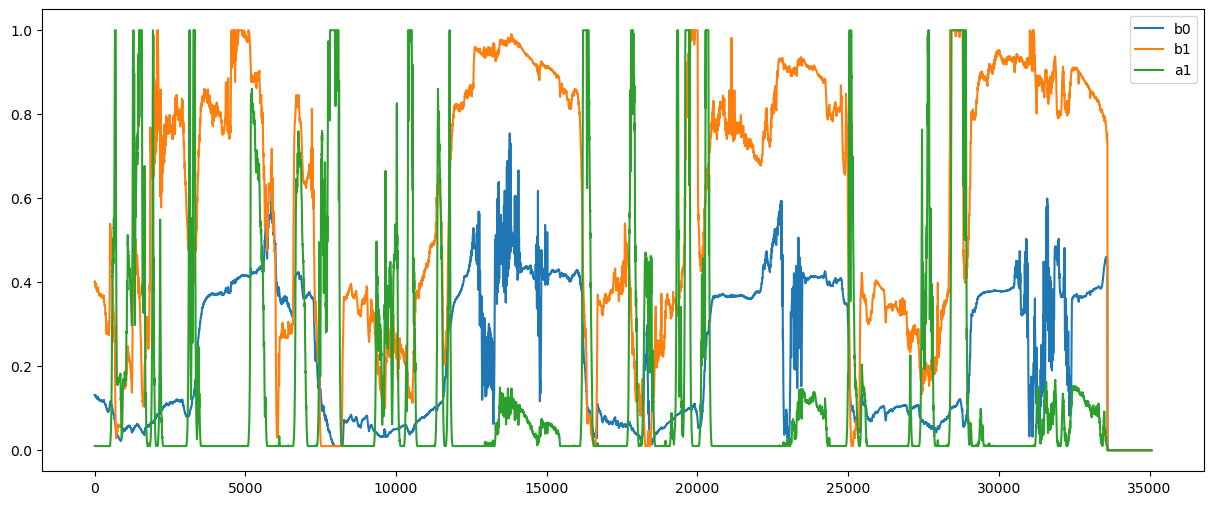

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(15, 6))
ax.plot(pars[:,0], label='b0')

ax.plot(pars[:,1], label='b1')

# ax.plot(pars[:,2], label='a0')
ax.plot(pars[:,3], label='a1')
# ax.plot(pars[:,4], label='mu')
# ax.plot(pars[:,5], label='k')
ax.legend()

array([0.13229506, 0.40248831, 0.01153468, 0.01      , 0.68944886,
       0.04875602])

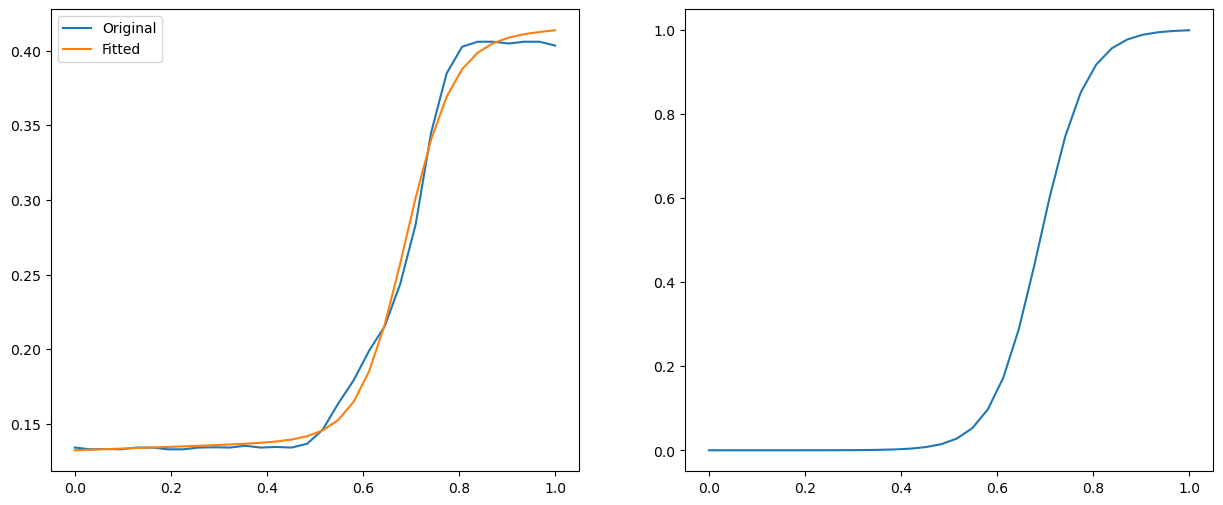

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(15, 6))
idx = 1
 

p = np.copy(pars[idx])

ax[0].plot(x, X[idx], label='Original')
ax[0].plot(x, STAR(x, *p), label='Fitted')
ax[0].legend()

ax[1].plot(x, 1/(1+np.exp(-(x-p[4])/p[5])))
pars[idx]

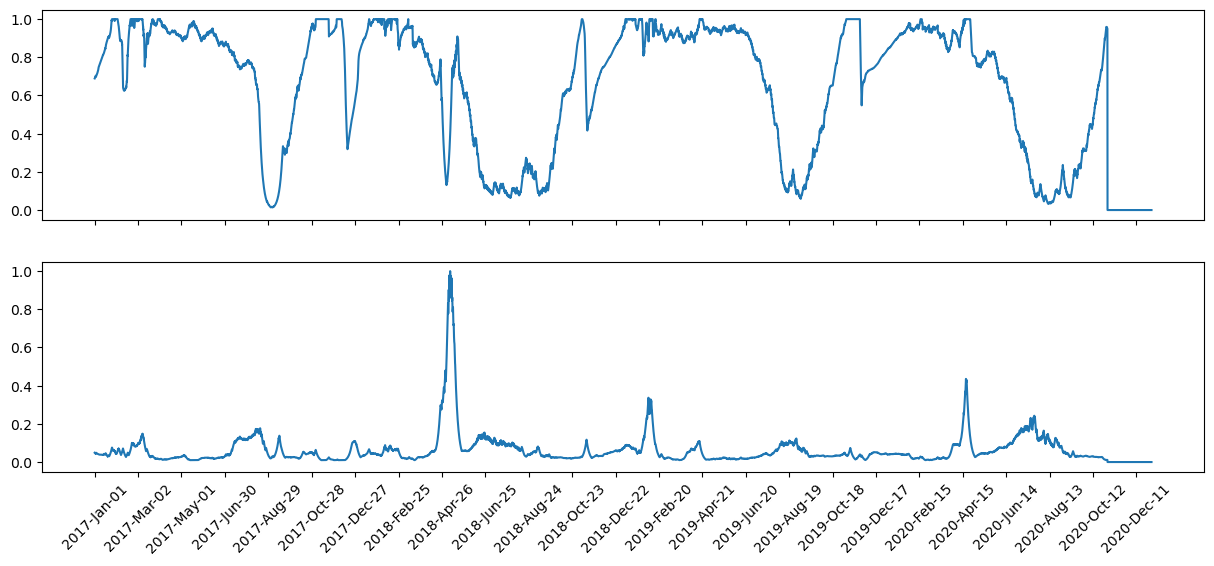

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(15, 6),sharex=True)
# ax.plot(pars[:,0], label='b0')
# ax.plot(pars[:,1], label='b1')
# ax.plot(pars[:,2], label='a0')
# ax.plot(pars[:,3], label='a1')
ax[0].plot(pars[:,4], label='mu')
ax[1].plot((pars[:,5]), label='k')
xticks = df.index[::1440].strftime('%Y-%b-%d')
ax[1].set_xticks(range(0, len(df), 1440))
ax[1].set_xticklabels(xticks, rotation=45);


/var/folders/z9/0dn8cp0n5c5drj20sfg27q680000gn/T/ipykernel_2454/3717785704.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html


(10.0, 90.0)

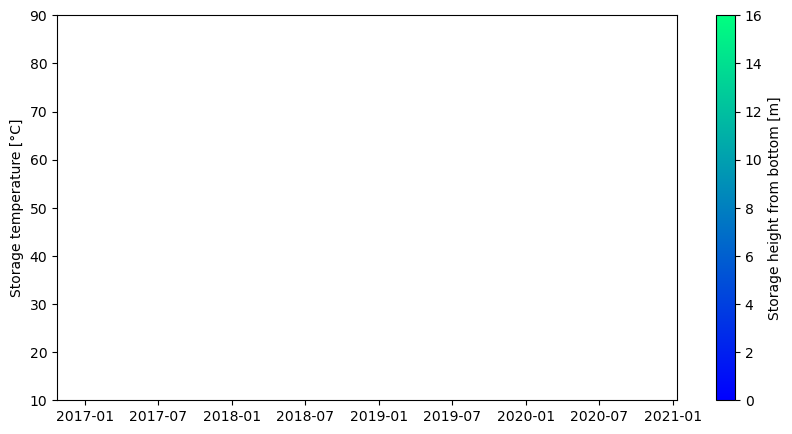

In [ ]:
import matplotlib
cmap = matplotlib.cm.get_cmap('winter') #  select a colormap for the plot from https://matplotlib.org/stable/tutorials/colors/colormaps.html

df1 = df.copy() # make a copy of the dataframe to use it for the plot

fig, ax = plt.subplots(figsize=(10,5))

# Plot color between two temperature sensors
for i in range(df1.shape[1]-1):
    c1 = df1.columns[i]
    c2 = df1.columns[i+1]
    ax.fill_between(df1.index, df1[c2], df1[c1],
                where=df1[c2] >= df1[c1],
                facecolor=cmap(i/len(df1.columns))
                   )
                
cax, _ = matplotlib.colorbar.make_axes(ax) 
cb2 = matplotlib.colorbar.ColorbarBase(
    cax, cmap=cmap, norm=plt.Normalize(0,16),
    label='Storage height from bottom [m]')

ax.plot(df1[df1.columns[0]], c='k', lw=0.4)
ax.plot(df1[df1.columns[int(df1.shape[1]/2)]], c='k', lw=0.4)
ax.plot(df1[df1.columns[-1]], c='k', lw=0.4)

# Format y-label and set y-limit
ax.set_ylabel('Storage temperature [°C]')
ax.set_ylim(10, 90)



In [ ]:
df1

,0.5,1.0,1.5,2.0,2.5,3.0,3.5,4.0,4.5,5.0,...,11.5,12.0,12.5,13.0,13.5,14.0,14.5,15.0,15.5,16.0
2017-01-01 00:00:00+01:00,0.134118,0.132941,0.132941,0.132941,0.133529,0.134118,0.132941,0.132941,0.134118,0.135294,...,0.283529,0.345882,0.384706,0.402941,0.405882,0.405882,0.404706,0.405882,0.405882,0.403529
2017-01-01 01:00:00+01:00,0.134118,0.132941,0.133137,0.132941,0.134118,0.134118,0.132941,0.132941,0.134118,0.134314,...,0.283529,0.345098,0.384706,0.402549,0.405882,0.405882,0.404706,0.405882,0.405882,0.403333
2017-01-01 02:00:00+01:00,0.134118,0.132941,0.132941,0.132941,0.134118,0.134118,0.132941,0.132941,0.134118,0.134706,...,0.282549,0.344706,0.384706,0.402745,0.405882,0.405882,0.404706,0.405882,0.405882,0.403333
2017-01-01 03:00:00+01:00,0.132941,0.132745,0.132941,0.132941,0.134118,0.134118,0.132941,0.132941,0.134118,0.135294,...,0.282353,0.343725,0.384118,0.402745,0.405882,0.405882,0.404706,0.405882,0.405882,0.403529
2017-01-01 04:00:00+01:00,0.132941,0.131765,0.132941,0.132941,0.134118,0.134118,0.133137,0.132941,0.135098,0.135294,...,0.281961,0.343529,0.383529,0.402353,0.405882,0.405882,0.404706,0.405882,0.405882,0.403529
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-31 19:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 20:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 21:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-12-31 22:00:00+01:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


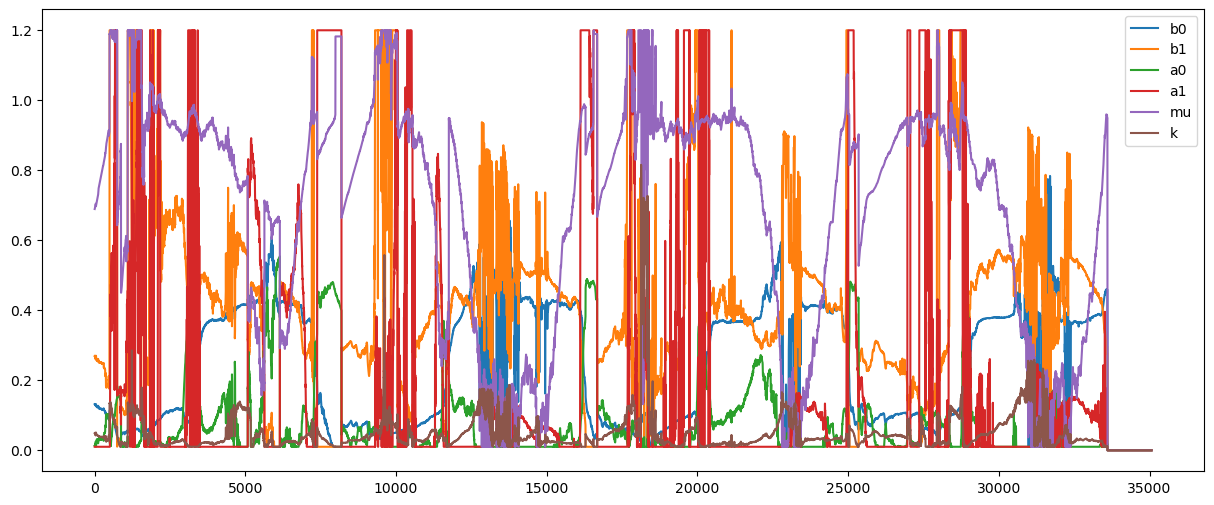

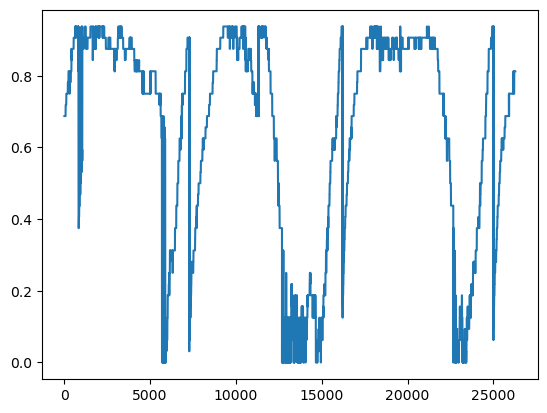

In [ ]:
ddf = df1.diff(axis = 1)
plt.plot(np.argmax(ddf.values[:,1:], axis = 1)/32)


b0 = 0.12
b1 = 0.39
a0 = 0.01
a1 = 0.00
mu = 0.79
k = 0.03


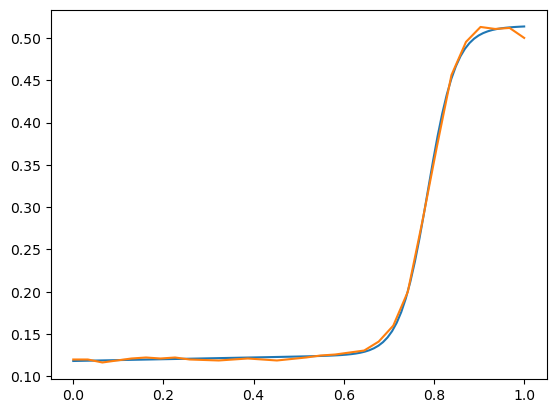

In [ ]:
idx = 1


plt.plot(x1, STAR(x1, *pars[idx]))
plt.plot(x, X[idx])

params = ['b0', 'b1', 'a0', 'a1', 'mu', 'k']
for i, v in enumerate(pars[idx]):
    print(f'{params[i]} = {v:.2f}')

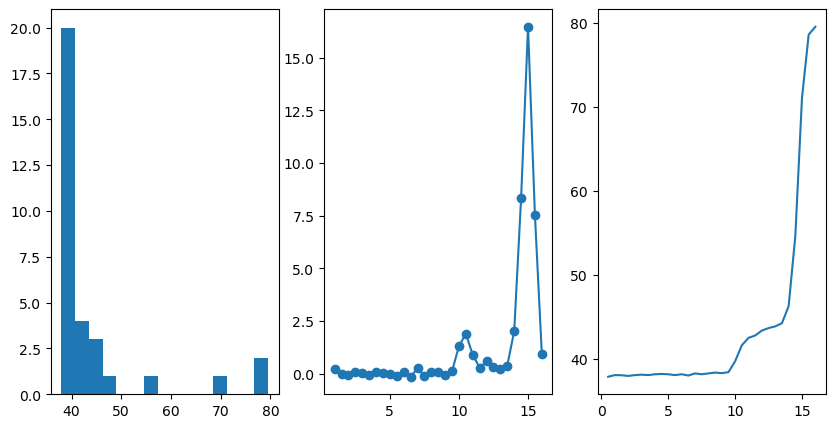

In [ ]:
data = temp.iloc[4000]

fig, ax = plt.subplots(1,3, figsize = (10,5))
ax[0].hist(data, bins = 15);
ax[1].plot((data.diff()), marker = 'o')
ax[2].plot(data)

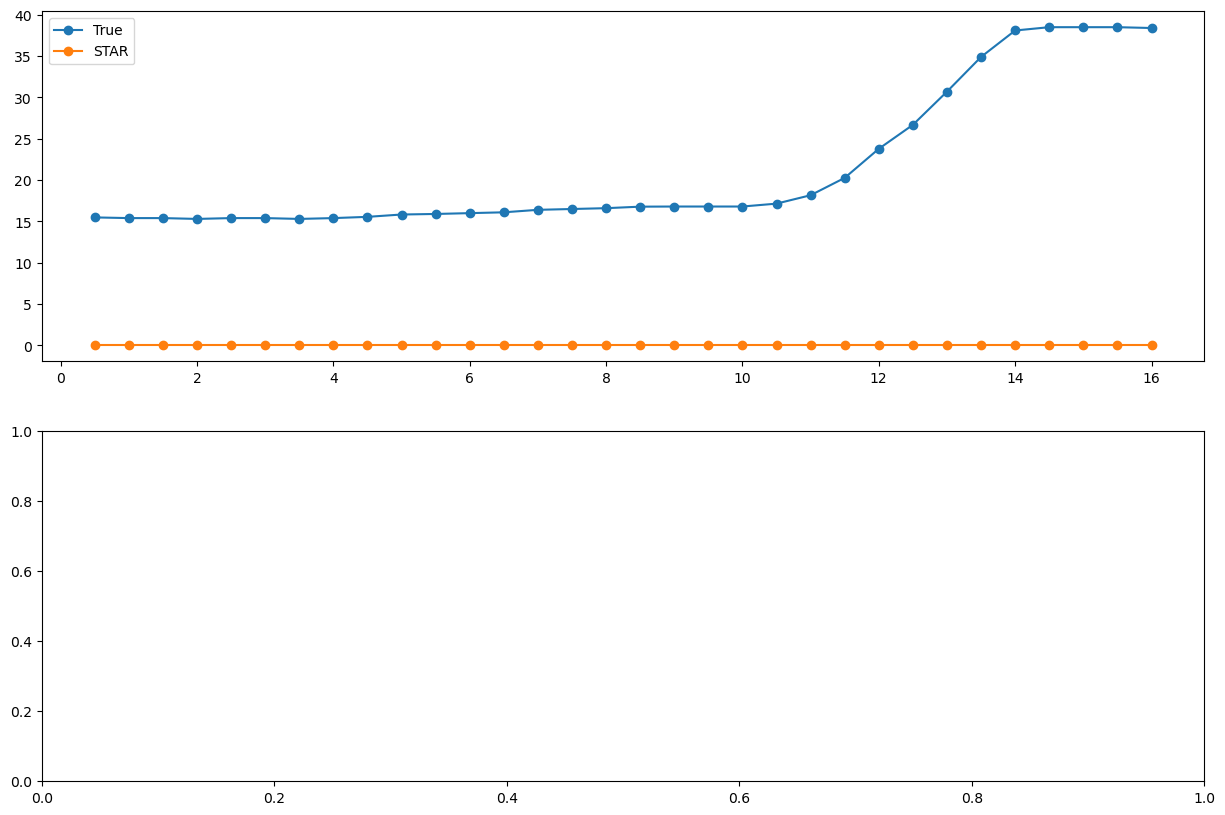

In [ ]:

i = 200

data = temp.iloc[i]
x = data.index
y = data.values
p = pars[i]

yp = STAR(x, *p)
fig, ax = plt.subplots(2,1,figsize = (15, 10))
ax[0].plot(x, y, '-o', label = 'True')
ax[0].plot(x, yp, '-o', label = 'STAR')
ax[0].legend()
# ax[1].plot(x, y-yp, '-o', label = 'Residuals', color = 'red')


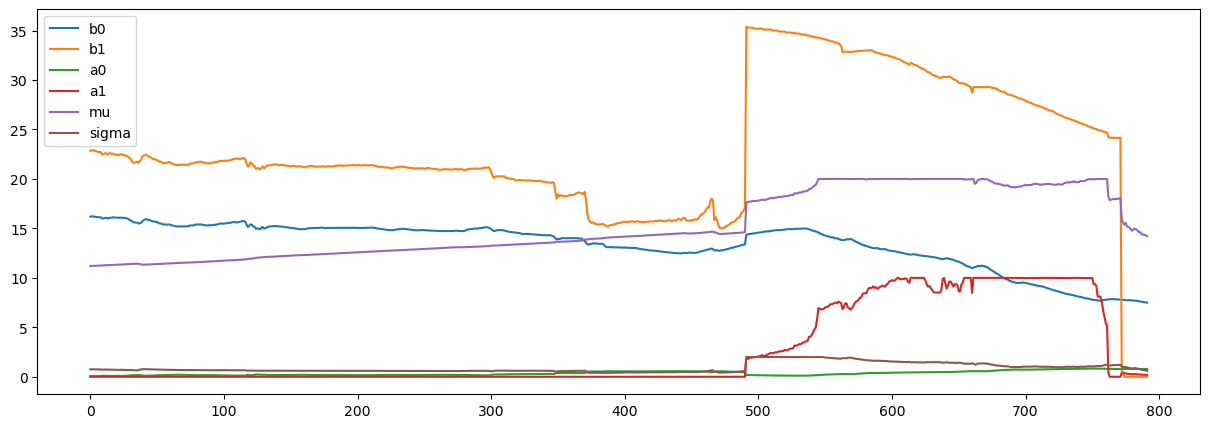

In [ ]:
fig, ax = plt.subplots(1,1,figsize = (15, 5))
ax.plot(pars[:,0], label = 'b0')
ax.plot(pars[:,1], label = 'b1')
ax.plot(pars[:,2], label = 'a0')
ax.plot(pars[:,3], label = 'a1')
ax.plot(pars[:,4], label = 'mu')
ax.plot(pars[:,5], label = 'sigma')
ax.legend()

<Axes: >

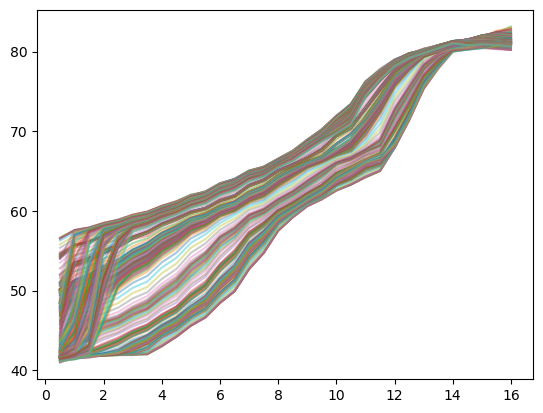

In [ ]:
temp.iloc[5500:6000].T.plot(legend=False, alpha = 0.4)